# EDA

Objetivos del Proyecto:

- Explore un conjunto de datos con el marco Pandas.
- Construye tablas dinámicas.
- Visualice el conjunto de datos con varios tipos de gráficos.

In [3]:
# instalacion de pycoingecko

!pip install -U pycoingecko


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#importamos librerias necesarias 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import time as t
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI
import warnings
warnings.filterwarnings('ignore')

In [6]:
cg = CoinGeckoAPI()

# criptomonedas

In [5]:
#obtener una lista de criptomonedas como activas  , ordenar df por id
# include_plattform :indicador para incluir direcciones de contrato de plataforma (p. ej., 0x.... para tokens basados ​​en Ethereum).valores válidos: verdadero, falso
# name: nombre del criptomoneda

lista_moneda=cg.get_coins_list(include_platform=True)
criptomonedas = pd.DataFrame.from_dict(lista_moneda).sort_values('id').reset_index(drop=True)
criptomonedas

,id,symbol,name,platforms
0,01coin,zoc,01coin,{}
1,0chain,zcn,Zus,{'ethereum': '0xb9ef770b6a5e12e45983c5d8054525...
2,0vix-protocol,vix,0VIX Protocol,{}
3,0x,zrx,0x Protocol,{'ethereum': '0xe41d2489571d322189246dafa5ebde...
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract,{'ethereum': '0x5a3e6a77ba2f983ec0d371ea3b475f...
...,...,...,...,...
10209,zyberswap,zyb,Zyberswap,{'arbitrum-one': '0x3b475f6f2f41853706afc9fa6a...
10210,zynecoin,zyn,Zynecoin,{}
10211,zynergy,zyn,Zynergy,{'zksync': '0x0231b3de40b6b3bdd28dcef037f1b7a3...
10212,zyx,zyx,ZYX,{'ethereum': '0xf974b5f9ac9c6632fee8b76c61b024...


In [ ]:
# lista de plataformas activas que estan en assetplatform pero no esta en coin_list
main1 = np.setdiff1d(list(assetPlatforms['id']),list(moneda_dataframe['platforms'].apply( lambda x : list(x.keys()) if type(x)==dict else x ).explode()))
main1

In [7]:
#transformacion de la variable contract_adress
criptomonedas['plataforma_list']=criptomonedas['platforms'].apply( lambda x : list(x.values()) if type(x)==dict else x )

In [ ]:
# vista de name duplicados
criptomonedas[criptomonedas['name'].duplicated(keep=False)]

 - exiten duplicados en name de criptomonedas mas los ids son distintos .por tanto trabajaremos con ids

In [7]:
#lista =criptomonedas.explode(['plataforma_list'])['plataforma_list'].dropna().reset_index(drop=True).tolist()

In [9]:
#obtener lista de monedas admitidas ej. usd,eur, etc.
counterCurrencies = cg.get_supported_vs_currencies()


In [10]:
coins1=list(criptomonedas['id'].loc[0:600]) #lista maxima de criptomendas
coins2=list(criptomonedas['id'].loc[601:1201])
coins3=list(criptomonedas['id'].loc[1202:1802])
coins4=list(criptomonedas['id'].loc[1803:2403])
coins5=list(criptomonedas['id'].loc[2404:3004])
coins6=list(criptomonedas['id'].loc[3005:3605])
coins7=list(criptomonedas['id'].loc[3606:4206])
coins8=list(criptomonedas['id'].loc[4207:4807])
coins9=list(criptomonedas['id'].loc[4808:5408])
coins10=list(criptomonedas['id'].loc[5409:6009])
coins11=list(criptomonedas['id'].loc[6010:6610])
coins12=list(criptomonedas['id'].loc[6611:7211])
coins13=list(criptomonedas['id'].loc[7212:7812])
coins14=list(criptomonedas['id'].loc[7813:8413])
coins15=list(criptomonedas['id'].loc[8414:9014])
coins16=list(criptomonedas['id'].loc[9015:9615])
coins17=list(criptomonedas['id'].loc[9616:10216])

In [11]:
#solicitud de precio más simple: formato de diccionario anidado

simplePriceRequest1 = cg.get_price(ids =coins1, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True)
simplePriceRequest2 = cg.get_price(ids =coins2, vs_currencies =counterCurrencies ,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True)
simplePriceRequest3 = cg.get_price(ids =coins3, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest4 = cg.get_price(ids =coins4, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest5= cg.get_price(ids =coins5, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest6 = cg.get_price(ids =coins6, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest7 = cg.get_price(ids =coins7, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest8 = cg.get_price(ids =coins8, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest9 = cg.get_price(ids =coins9, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest10 = cg.get_price(ids =coins10, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest11 = cg.get_price(ids =coins11, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest12 = cg.get_price(ids =coins12, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest13 = cg.get_price(ids =coins13, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest14 = cg.get_price(ids =coins14, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest15 = cg.get_price(ids =coins15, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest16 = cg.get_price(ids =coins16, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
simplePriceRequest17 = cg.get_price(ids =coins17, vs_currencies =counterCurrencies,include_market_cap=True ,include_24hr_vol=True,include_last_updated_at=True )
#implePriceRequest = cg.get_price(ids =coins1, vs_currencies =counterCurrencies )


In [12]:
#dataframes 
precio1 = pd.DataFrame.from_dict(list(simplePriceRequest1.values())).reset_index(drop=True)
precio2 = pd.DataFrame.from_dict(list(simplePriceRequest2.values())).reset_index(drop=True)
precio3 = pd.DataFrame.from_dict(list(simplePriceRequest3.values())).reset_index(drop=True)
precio4 = pd.DataFrame.from_dict(list(simplePriceRequest4.values())).reset_index(drop=True)
precio5 = pd.DataFrame.from_dict(list(simplePriceRequest5.values())).reset_index(drop=True)
precio6 = pd.DataFrame.from_dict(list(simplePriceRequest6.values())).reset_index(drop=True)
precio7 = pd.DataFrame.from_dict(list(simplePriceRequest7.values())).reset_index(drop=True)
precio8 = pd.DataFrame.from_dict(list(simplePriceRequest8.values())).reset_index(drop=True)
precio9 = pd.DataFrame.from_dict(list(simplePriceRequest9.values())).reset_index(drop=True)
precio10 = pd.DataFrame.from_dict(list(simplePriceRequest10.values())).reset_index(drop=True)
precio11 = pd.DataFrame.from_dict(list(simplePriceRequest11.values())).reset_index(drop=True)
precio12 = pd.DataFrame.from_dict(list(simplePriceRequest12.values())).reset_index(drop=True)
precio13 = pd.DataFrame.from_dict(list(simplePriceRequest13.values())).reset_index(drop=True)
precio14 = pd.DataFrame.from_dict(list(simplePriceRequest14.values())).reset_index(drop=True)
precio15 = pd.DataFrame.from_dict(list(simplePriceRequest15.values())).reset_index(drop=True)
precio16 = pd.DataFrame.from_dict(list(simplePriceRequest16.values())).reset_index(drop=True)
precio17 = pd.DataFrame.from_dict(list(simplePriceRequest17.values())).reset_index(drop=True)


In [13]:
# extraccion de keys() e insercion de una columna que contenga los keys()
tipo1=pd.Series(list(simplePriceRequest1.keys()))
tipo2=pd.Series(list(simplePriceRequest2.keys()))
tipo3=pd.Series(list(simplePriceRequest3.keys()))
tipo4=pd.Series(list(simplePriceRequest4.keys()))
tipo5=pd.Series(list(simplePriceRequest5.keys()))
tipo6=pd.Series(list(simplePriceRequest6.keys()))
tipo7=pd.Series(list(simplePriceRequest7.keys()))
tipo8=pd.Series(list(simplePriceRequest8.keys()))
tipo9=pd.Series(list(simplePriceRequest9.keys()))
tipo10=pd.Series(list(simplePriceRequest10.keys()))
tipo11=pd.Series(list(simplePriceRequest11.keys()))
tipo12=pd.Series(list(simplePriceRequest12.keys()))
tipo13=pd.Series(list(simplePriceRequest13.keys()))
tipo14=pd.Series(list(simplePriceRequest14.keys()))
tipo15=pd.Series(list(simplePriceRequest15.keys()))
tipo16=pd.Series(list(simplePriceRequest16.keys()))
tipo17=pd.Series(list(simplePriceRequest17.keys()))

precio1.insert (0, "id", tipo1)
precio2.insert (0, "id", tipo2)
precio3.insert (0, "id", tipo3)
precio4.insert (0, "id", tipo4)
precio5.insert (0, "id", tipo5)
precio6.insert (0, "id", tipo6)
precio7.insert (0, "id", tipo7)
precio8.insert (0, "id", tipo8)
precio9.insert (0, "id", tipo9)
precio10.insert (0, "id", tipo10)
precio11.insert (0, "id", tipo11)
precio12.insert (0, "id", tipo12)
precio13.insert (0, "id", tipo13)
precio14.insert (0, "id", tipo14)
precio15.insert (0, "id", tipo15)
precio16.insert (0, "id", tipo16)
precio17.insert (0, "id", tipo17)


In [14]:
#concatenamos los dataframes creados
concatenated_df = pd.concat([precio1,precio2,
                             precio3,
                             precio4,precio5,precio6,precio7,precio8,precio9,precio10,precio11,precio12,precio13,precio14,precio15,precio16,precio17], ignore_index=True)

In [15]:
concatenated_df.head(3)

,id,btc,btc_market_cap,btc_24h_vol,eth,eth_market_cap,eth_24h_vol,ltc,ltc_market_cap,ltc_24h_vol,...,xau,xau_market_cap,xau_24h_vol,bits,bits_market_cap,bits_24h_vol,sats,sats_market_cap,sats_24h_vol,last_updated_at
0,01coin,1.000000e-08,0.000000,0.000060,1.563770e-07,0.00000,0.000938,0.000004,0.000000,0.024389,...,1.385270e-07,0.00000,0.000831,0.01,0.000000e+00,60.000000,1.00,0.000000e+00,6.000000e+03,1692493336
1,0chain,4.220000e-06,203.893571,0.022605,6.653000e-05,3211.96146,0.356155,0.001689,81563.550361,9.041680,...,5.744000e-05,2773.15276,0.307483,4.22,2.038936e+08,22605.042561,422.29,2.038936e+10,2.260504e+06,1693008213
2,0vix-protocol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
## recuento de nulos por columna
concatenated_df.isna().sum()

id                   0
btc                344
btc_market_cap     390
btc_24h_vol        442
eth                344
                  ... 
bits_24h_vol       445
sats               347
sats_market_cap    393
sats_24h_vol       445
last_updated_at      0
Length: 185, dtype: int64

In [17]:

#conteo de duplicados
concatenated_df.duplicated().value_counts()

False    8754
dtype: int64

## Analisis univariante

In [18]:
#descripcion estadistica sobre variables numericas usd , usd_market_cap,usd_24h_vol
concatenated_df[['usd','usd_market_cap','usd_24h_vol']].describe()

,usd,usd_market_cap,usd_24h_vol
count,8.410000e+03,8.364000e+03,8.410000e+03
mean,6.450397e+09,5.999300e+07,8.396178e+06
std,5.915206e+11,2.402714e+09,3.967375e+08
min,-2.153546e-02,0.000000e+00,0.000000e+00
25%,2.012225e-04,0.000000e+00,5.208364e+01
50%,4.705585e-03,0.000000e+00,2.568686e+03
75%,9.977775e-02,3.548251e+05,4.661202e+04
max,5.424602e+13,1.987431e+11,3.287759e+10


 - se tiene una descripcion estadistica de las variables de precio , capitalizacion de mercado ,volumen de 24 horas solo en dolares .

In [19]:
print(concatenated_df.loc[:, ['id','usd_market_cap','usd_24h_vol']].sort_values(by='usd_market_cap',ascending=False).reset_index(drop=True).head(5).rename(columns={'id':'id_de_la_criptomoneda','usd_market_cap':'capitalizacion_de_mercado_usd','usd_24h_vol':'volumen de 24 horas'}))
print('---------------------------------------------------------------------------')
print(concatenated_df.loc[:, ['id','usd','usd_market_cap','usd_24h_vol']].sort_values(by='usd',ascending=False).reset_index(drop=True).head(5).rename(columns={'id':'id_de_la_criptomoneda','usd':'precio_en_dolares','usd_market_cap':'capitalizacion_de_mercado_en_usd','usd_24h_vol':'volumen de 24 horas'}))
print('---------------------------------------------------------------------------')
print(concatenated_df.loc[:, ['id','usd_market_cap','usd_24h_vol']].sort_values(by='usd_24h_vol',ascending=False).reset_index(drop=True).head(5).rename(columns={'id':'id_de_la_criptomoneda','usd_market_cap':'capitalizacion_de_mercado_en_usd','usd_24h_vol':'volumen de 24 horas'}))

  id_de_la_criptomoneda  capitalizacion_de_mercado_usd  volumen de 24 horas
0              ethereum                   1.987431e+11         5.746333e+09
1                tether                   8.278778e+10         1.345512e+10
2                ripple                   2.783531e+10         9.159876e+08
3              usd-coin                   2.596476e+10         3.781410e+09
4               cardano                   9.146248e+09         2.182913e+08
---------------------------------------------------------------------------
  id_de_la_criptomoneda  precio_en_dolares  capitalizacion_de_mercado_en_usd  \
0  aave-amm-uniwbtcusdc       5.424602e+13                               0.0   
1  aave-amm-uniwbtcweth       1.638259e+09                               0.0   
2  aave-amm-uniusdcweth       1.791431e+08                               0.0   
3   aave-amm-unidaiusdc       2.257808e+06                               0.0   
4    maya-preferred-223       4.907950e+05                          

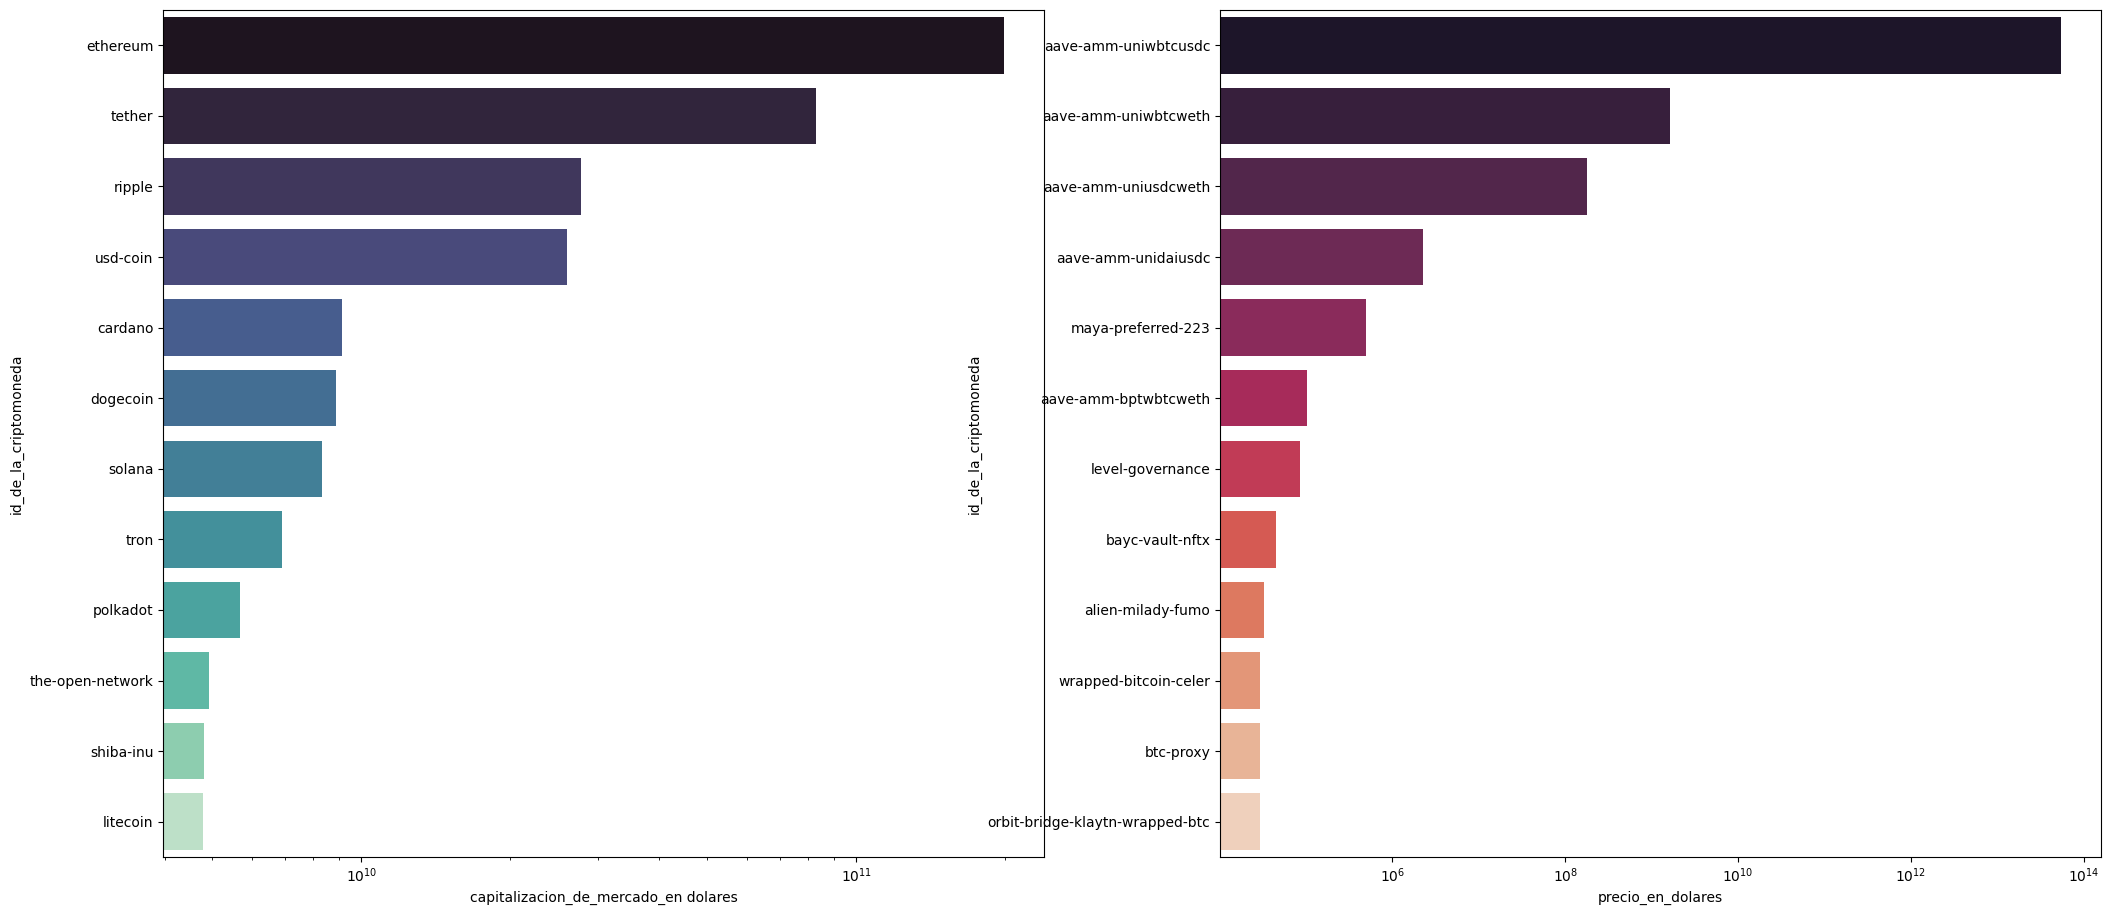

In [20]:
# precio de las criptomonedas en dolares en orden ascendente , capitalizacion de mercado en dolares en orden ascendente

da2=concatenated_df.loc[:, ['id','usd_market_cap']].sort_values(by='usd_market_cap',ascending=False).reset_index(drop=True).head(12).rename(columns={'id':'id_de_la_criptomoneda','usd_market_cap':'capitalizacion_de_mercado_en dolares'})
da1=concatenated_df.loc[:, ['id','usd']].sort_values(by='usd',ascending=False).reset_index(drop=True).head(12).rename(columns={'id':'id_de_la_criptomoneda','usd':'precio_en_dolares'})
fig, axs = plt.subplots(ncols=2,  figsize=(25, 11))
sns.barplot(data=da2, x='capitalizacion_de_mercado_en dolares',y='id_de_la_criptomoneda',orient='h',palette="mako",log=True,ax=axs[0])#.set_xticklabels(sns.barplot(data=da2, x='capitalizacion_de_mercado_en dolares',y='id_de_la_criptomoneda',orient='h',palette="deep",log=True,ax=axs[0]).get_xticklabels(),rotation=20)
sns.barplot(data=da1, x='precio_en_dolares', y= 'id_de_la_criptomoneda',orient='h',palette="rocket",log=True,ax=axs[1])#.set_xticklabels(sns.barplot(data=da1, x='precio_en_dolares', y='id_de_la_criptomoneda' ,orient='h',palette="rocket",log=True,ax=axs[1]).get_xticklabels(),rotation=20)
#plt.xscale('log')
plt.show()

 - en el primer barplot del grafico anterior se ordena segun capitalizacion de mercado en dolares de las id de criptomonedas
 - en el segundo barplot se ordena segun el precio en dolares de las id de criptomonedas

  - en escala logaritmica

In [22]:
#criptomonedas.merge(concatenated_df,on='id')[['id','name','usd','usd_market_cap','usd_24h_vol','eur','link']].sort_values(by='usd_market_cap',ascending=False).reset_index(drop=True).head(7)

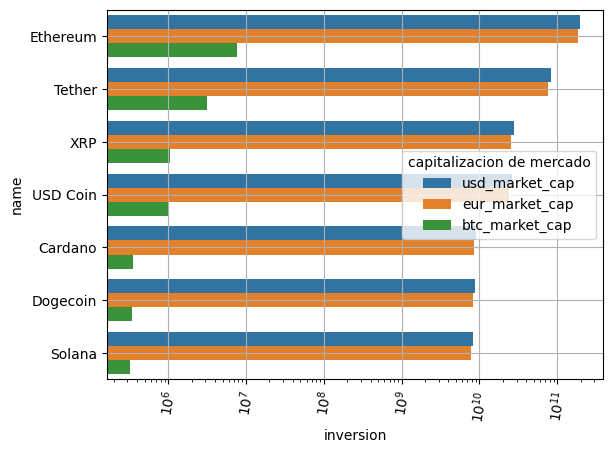

In [21]:
# las 7 criptomonedas por nombre  con capitalizacion de mercado   mayor en dolares ,euros y bitcoins
j=sns.barplot(data=pd.melt(criptomonedas.merge(concatenated_df,on='id')[['name','usd_market_cap','eur_market_cap','btc_market_cap']].sort_values(by='usd_market_cap',ascending=False).reset_index(drop=True).head(7),
                           id_vars="name", var_name="capitalizacion de mercado",
                           value_name="inversion"),x='inversion', y='name', hue='capitalizacion de mercado',orient='h')
j.set_xticklabels(j.get_xticklabels(),rotation=80)
plt.xscale('log')
plt.grid()
plt.show()

 - del grafico anterior se muestra las 7 mayor capitalizacon de mercado de las
criptomonedas  , en dolares , euros y bitcoins . del total de criptomonedas por nombre

 ## conclusiones

 - La capitalización de mercado es una métrica útil para comparar el valor total de las criptomonedas.es una estimación de su valor total de acuerdo con su precio de mercado actual.

 - **Las criptomonedas con gran capitalización de mercado**: como **ethereum y tether,ripple, usd-coin ,  staked-ether** .tienen una capitalización de mercado de más de $10.000 millones. Según los inversionistas, estos activos son inversiones de bajo riesgo porque tienen un historial de crecimiento demostrado y, por lo general, su nivel de liquidez es más alto. Esto significa que pueden soportar que un volumen de personas más grande las venda sin que el precio se vea afectado en gran medida.

 - **Las criptomonedas con capitalización de mercado mediana** cuentan con capitalizaciones de entre  1000 millones y 10.000 millones. pero también puede tener un riesgo más alto.

 - **Las criptomonedas con capitalización de mercado baja** tienen una capitalización de mercado menor a $1000 millones y son las más susceptibles a sufrir cambios dramáticos según la psicología de mercado.

In [22]:
# verifiquemos que criptomonedas de alguna lista de criptomonedas no estan en el dataframe general

main_list = np.setdiff1d(coins2,list(concatenated_df['id']))
main_list

array(['binance-peg-busd', 'binance-peg-cardano', 'binance-peg-dogecoin',
       'binance-peg-eos', 'binance-peg-filecoin', 'binance-peg-firo',
       'binance-peg-iotex', 'binance-peg-litecoin',
       'binance-peg-ontology', 'binance-peg-polkadot', 'binance-peg-xrp',
       'binance-usd', 'binance-usd-linea', 'binance-wrapped-btc',
       'binance-wrapped-dot', 'binancecoin', 'binanceidr', 'binarydao',
       'binaryx', 'binaryx-2', 'bincentive', 'binemon', 'binspirit',
       'binstarter', 'bintex-futures', 'biokript', 'biometric-financial',
       'biopassport', 'bios', 'birake', 'birb-2', 'bird-money',
       'birdtoken', 'biskit-protocol', 'bismuth', 'biso', 'bistroo',
       'biswap', 'bit-game-verse-token', 'bit-hotel', 'bit-store-coin',
       'bit2me', 'bitazza', 'bitball', 'bitbar', 'bitbase-token',
       'bitbook-token', 'bitboost', 'bitcanna', 'bitcash', 'bitcastle',
       'bitcci-cash', 'bitci-racing-token', 'bitcicoin', 'bitcoin',
       'bitcoin-2', 'bitcoin-2-0', 'bi

 - nota : aquellas criptomonedas que no estan en el dataframe general la api las considera  como {} o vacio. por tanto no se registran estas instancias

# plataforma de activos

In [ ]:
#obtener Utilice esto para obtener todos los identificadores NFT con el fin de realizar llamadas API, paginadas a 100 elementos.

nfts= cg.get_nfts_list()
datos_nfts=pd.DataFrame.from_dict(nfts)
datos_nfts

In [ ]:
main_li = np.setdiff1d(list(plataformas_blockhain['id']),list(datos_nfts['asset_platform_id']))
main_li

In [26]:
# lista de todas las plataformas de activos (redes blockchain) : o tecnologia blockchain
assetPlatformsList = cg.get_asset_platforms()
plataformas_blockhain = pd.DataFrame.from_dict(assetPlatformsList
                   ).sort_values('id').reset_index(drop=True)

In [28]:
#eliminemos id vacios o no definidos en plataforma_activos

indexAge = plataformas_blockhain[plataformas_blockhain['id']==''].index
plataformas_blockhain.drop(indexAge , inplace=True)
plataformas_blockhain=plataformas_blockhain.reset_index(drop=True)

In [29]:
plataformas_blockhain

,id,chain_identifier,name,shortname
0,Bitcichain,NaN,Bitcichain,Bitcichain
1,ShibChain,NaN,ShibChain,
2,acala,NaN,Acala,
3,achain,NaN,Achain,
4,algorand,NaN,Algorand,
...,...,...,...,...
159,xdc-network,50.0,XDC Network,xdc xinfin
160,xrp,NaN,XRP Ledger,xrp
161,yocoin,NaN,Yocoin,yocoin
162,zilliqa,NaN,Zilliqa,


 - hay 164 tecnologias blockcahin :son cadena de bloques que registra todas las transacciones, almacenadas y compartidas de forma pública

In [30]:
# todal las plataformas blockchain incluye a la coolumna criptomonedas['platforms']
li1=criptomonedas["platforms"].apply(lambda x: list(x.keys()) if type(x)==dict and len(list(x.keys()))>0 and list(x.keys())[0]!='' else np.NaN).explode().dropna().unique()
main_li = np.setdiff1d(list(li1),list(plataformas_blockhain['id'])) # las plataformas de blockchain engloba en su totalidad a las  de criptomoneda['platforms].keys()
main_li

array([], dtype='<U24')

In [31]:
#desanindando la columna criptomonedas["platforms"] a un dataframe que contiene id tecnologia blockchain y contract adress
li1=criptomonedas["platforms"].apply(lambda x: list(x.keys()) if type(x)==dict  else x).explode().reset_index(drop=True) #.dropna().unique()  #and len(list(x.keys()))>0 and list(x.keys())[0]!=''  and list(x.keys())[0]!=''
li2=criptomonedas["platforms"].apply(lambda x: list(x.values()) if type(x)==dict  else x).explode().reset_index(drop=True)
result = list(zip(li1, li2))
t_blockchain_adress = pd.DataFrame(result, columns= ['tecnologia_blockchain', 'contract adress'])
t_blockchain_adress=t_blockchain_adress.dropna(how='all')


In [32]:
#criptomonedas["platforms"] a dataframe
t_blockchain_adress.head()

,tecnologia_blockchain,contract adress
1,ethereum,0xb9ef770b6a5e12e45983c5d80545258aa38f3b78
2,polygon-pos,0x8bb30e0e67b11b978a5040144c410e1ccddcba30
4,ethereum,0xe41d2489571d322189246dafa5ebde1f4699f498
5,energi,0x591c19dc0821704bedaa5bbc6a66fee277d9437e
6,harmony-shard-0,0x8143e2a1085939caa9cef6665c2ff32f7bc08435


In [33]:
#funcion para bosquejo de precio actual de tokens segun plataforma y direcciones de contrato
def fun(x):
  j=cg.get_token_price(id=x['tecnologia_blockchain'],contract_addresses=x['contract adress'],vs_currencies='usd').values()
  return  j

In [34]:

# obtenga el precio actual de tokens para una plataforma determinada en cualquier otra moneda que necesite
# id : id de la plataforma de activos
# contract adresses : direccion de conmtrato
# vs_currencies : costo de la moneda ppor ejemplo en usd ,eur,etc .
#include_market_cap :para incluir market_cap
#include_24hr_vol : para incluir 24hr_vol
#include_24hr_change : para incluir 24hr_change
#include_last_updated_at : para incluir last_updated_at
#precisionc :full or any value between 0 - 18 to specify decimal place for currency price value
# consultar solo con la columna
obtener_token_price=cg.get_token_price(id='ethereum',contract_addresses='0xf974b5f9ac9c6632fee8b76c61b0242ce69c839d',vs_currencies='usd'  )
obtener_token_price

{'0xf974b5f9ac9c6632fee8b76c61b0242ce69c839d': {'usd': 0.00684145}}

In [35]:
# añadimos una columna de precio de tokens en usd
g=t_blockchain_adress.head(20)
g['precio de los token en usd']=g.apply(fun,axis=1).reset_index(drop=True)  #.dropna().unique()  #and len(list(x.keys()))>0 and list(x.keys())[0]!=''  and list(x.keys())[0]!=''


In [36]:
# desanidamos la columna a float
g['precio de los token en usd']=g['precio de los token en usd'].dropna().reset_index(drop=True).apply(lambda x : list(list(x)[0].values())[0] if x!= np.NaN else 0)

  tecnologia_blockchain                             contract adress  \
0              ethereum  0xb9ef770b6a5e12e45983c5d80545258aa38f3b78   
1           polygon-pos  0x8bb30e0e67b11b978a5040144c410e1ccddcba30   
2                fantom  0xc165d941481e68696f43ee6e99bfb2b23e0e3114   
3                fantom  0xc5a9848b9d145965d821aaec8fa32aaee026492d   
4              ethereum  0x570147337f1a2313fc35573f6a123ceb109eb901   
5              ethereum  0x994a258c7dec633b5b15376f850d5ea701179e79   

   precio de los token en usd  
0                    0.172031  
1                    0.172031  
2                    0.051433  
3                    0.051433  
4                    0.051433  
5                    0.051433  
-------------------------------------------------------------------------------


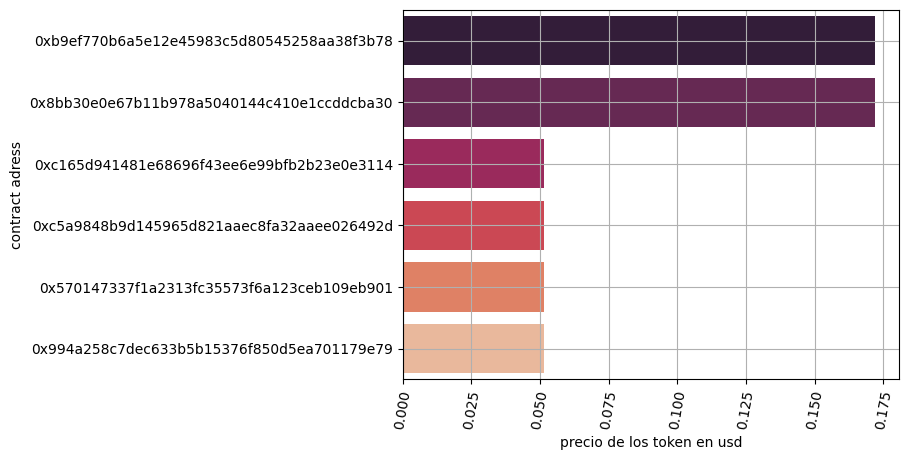

In [42]:
# las principales plataformas con direccion de contrato en los precios de tokens respecto a las 6 primeras filas
print(g[['tecnologia_blockchain','contract adress','precio de los token en usd']].sort_values(by='precio de los token en usd',ascending=False).reset_index(drop=True).head(6))
print('-------------------------------------------------------------------------------')
t=sns.barplot(data=g[['contract adress','precio de los token en usd']].sort_values(by='precio de los token en usd',ascending=False).reset_index(drop=True).head(6), x="precio de los token en usd", y="contract adress",palette="rocket",orient='h')
t.set_xticklabels(t.get_xticklabels(),rotation=80)

plt.grid()
plt.show()

# criptomonedas y tecnologias blockchain

In [43]:
# get_coins_markets
#Use esto para obtener todos los datos del mercado de monedas (precio, capitalización de mercado, volumen), por página.
#Nota: cuando se proporcionan los parámetros 'categoría' e 'ids', el parámetro 'categoría' tiene prioridad sobre el parámetro 'ids'
#vs_currency :La moneda objetivo de los datos de mercado (usd, eur, jpy, etc.)
#ids :Los identificadores de la moneda, símbolos de criptomonedas separados por comas (base). se refiere /coins/lista
#category :filtrar por categoría de moneda. Consulte /moneda/categorías/lista
 #order : valores válidos: market_cap_asc, market_cap_desc, volume_asc, volume_desc, id_asc, id_desc ordenar los resultados por campo
#per_page :valores válidos: 1..250 Resultados totales por página
#page : Página a través de resultados 1, 2 ,3 etc
#sparkline : Incluya datos de minigráficos de 7 días (p. ej., verdadero, falso)
#price_change_percentage : Incluya el porcentaje de cambio de precio en 1h, 24h, 7d, 14d, 30d, 200d, 1y (p. ej., ' 1h,24h,7d' separados por comas, los valores no válidos se descartarán)
#locale :valores válidos: ar, bg, cs, da, de, el, en, es, fi, fr, he, hi, hr, hu, id, it, ja, ko, lt, nl, no, pl, pt, ro , ru, sk, sl, sv, th, tr, reino unido, vi, zh, zh-tw
#precision :completo o cualquier valor entre 0 y 18 para especificar el lugar decimal para el valor del precio de la moneda


obtener_moneda_mercado=cg.get_coins_markets(vs_currency = 'usd',ids='bitcoin',per_page=1500) # category='stablecoins' # vs_currency,page ,  and category se pueden manipular'usd' varia segun una moneda especifica
moneda_mercado=pd.DataFrame.from_dict(obtener_moneda_mercado # crurrent price= vs_currency
                   ).sort_values(by='current_price',ascending=False).reset_index(drop=True)



In [44]:
pd.set_option('display.max_columns', None)
obtener_mercado=cg.get_coins_markets(vs_currency = 'usd',per_page=1500) # vs_currency, page  and category se pueden manipular'usd' ,  varia segun una moneda especifica
mercado_monedas=pd.DataFrame.from_dict(obtener_mercado # crurrent price= vs_currency
                   ).sort_values(by='current_price',ascending=False).reset_index(drop=True) # 40 paginas maximo

In [45]:
mercado_monedas.head(5)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,huobi-btc,hbtc,Huobi BTC,https://assets.coingecko.com/coins/images/1240...,26066.00,233795545,134,2.337955e+08,1.451900e+02,26317.00,25797.00,-234.389317,-0.89121,-2.123276e+06,-0.90000,8.969497e+03,8.969497e+03,8.969497e+03,166135.0,-84.31055,2022-04-21T18:59:43.859Z,10704.55,143.50053,2023-03-10T01:30:46.660Z,None,2023-08-25T23:29:00.265Z
1,bitcoin-avalanche-bridged-btc-b,btc.b,Bitcoin Avalanche Bridged (BTC.b),https://assets.coingecko.com/coins/images/2611...,26049.00,119506178,213,1.195062e+08,3.126058e+06,26251.00,25828.00,-66.048619,-0.25292,-3.079065e+06,-2.51177,4.589577e+03,4.589577e+03,NaN,42442.0,-38.51613,2023-01-16T22:36:24.558Z,7806.11,234.28566,2023-03-03T05:01:42.603Z,None,2023-08-26T00:18:33.598Z
2,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26045.00,506809645263,1,5.466969e+11,6.217403e+09,26200.00,25820.00,-89.880947,-0.34391,-2.038075e+09,-0.40053,1.946783e+07,2.100000e+07,2.100000e+07,69045.0,-62.28405,2021-11-10T14:24:11.849Z,67.81,38303.29169,2013-07-06T00:00:00.000Z,None,2023-08-26T00:18:59.245Z
3,wrapped-bitcoin,wbtc,Wrapped Bitcoin,https://assets.coingecko.com/coins/images/7598...,26038.00,4239356045,17,4.239356e+09,4.854670e+07,26202.00,25831.00,-129.775844,-0.49593,-1.082742e+07,-0.25475,1.627895e+05,1.627895e+05,1.627895e+05,70643.0,-63.12371,2021-11-10T14:40:19.650Z,3139.17,729.85750,2019-04-02T00:00:00.000Z,None,2023-08-26T00:19:04.202Z
4,yearn-finance,yfi,yearn.finance,https://assets.coingecko.com/coins/images/1184...,5766.17,190246194,159,2.111144e+08,2.958256e+07,5766.95,5532.28,112.760000,1.99458,3.160195e+06,1.68917,3.304164e+04,3.666600e+04,3.666600e+04,90787.0,-93.65635,2021-05-12T00:29:37.713Z,31.65,18099.32440,2020-07-18T12:26:27.150Z,None,2023-08-26T00:19:01.917Z


In [46]:
#descripcion estadistica
mercado_monedas.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,2.500000e+02,2.500000e+02,250.000000,2.400000e+02,2.500000e+02,2.470000e+02,2.470000e+02,247.000000,247.000000,2.480000e+02,248.000000,2.500000e+02,2.410000e+02,1.480000e+02,2.500000e+02,250.000000,250.000000,2.500000e+02
mean,5.404948e+02,4.270844e+09,125.500000,5.350240e+09,1.727971e+08,5.306196e+02,5.213738e+02,-2.055354,-0.407548,-1.351723e+07,-0.294022,6.364533e+14,1.757056e+15,2.854280e+15,5.510643e+05,-79.519887,129.387528,6.349419e+34
std,3.311695e+03,3.482425e+10,72.312977,3.804808e+10,1.255966e+09,3.343605e+03,3.288807e+03,19.869619,3.369580,1.436386e+08,3.455870,9.873927e+15,2.705389e+16,3.452264e+16,8.679827e+06,24.644851,881.144831,1.003931e+36
min,1.056000e-09,9.050232e+07,1.000000,9.240355e+07,0.000000e+00,1.115000e-09,1.049000e-09,-234.389317,-12.391490,-2.038075e+09,-12.802950,0.000000e+00,4.589577e+03,8.969497e+03,6.345000e-09,-100.000000,0.000000,2.856900e-01
25%,1.393665e-01,1.490458e+08,63.250000,2.010296e+08,2.150102e+06,1.464635e-01,1.380805e-01,-0.024354,-1.389865,-5.327425e+06,-1.547860,8.252326e+07,1.078187e+08,1.000000e+08,1.220000e+00,-95.689127,0.012428,4.516600e+01
50%,7.061280e-01,2.532492e+08,125.500000,4.375204e+08,8.224874e+06,7.728370e-01,7.111320e-01,-0.000657,-0.342230,-8.742174e+05,-0.350370,4.491424e+08,1.000000e+09,1.000000e+09,6.230000e+00,-90.916180,0.193030,2.870452e+02
75%,4.752500e+00,6.044402e+08,187.750000,1.031580e+09,2.641330e+07,4.800000e+00,4.640000e+00,0.000334,0.412705,1.490174e+06,0.529523,2.903224e+09,4.294967e+09,4.471225e+09,5.765000e+01,-71.712042,0.893429,1.772683e+03
max,2.606600e+04,5.068096e+11,250.000000,5.466969e+11,1.775110e+10,2.631700e+04,2.583100e+04,112.760000,21.507000,4.000096e+08,21.770520,1.561249e+17,4.200000e+17,4.200000e+17,1.372421e+08,-2.471100,10704.550000,1.587355e+37


 - de la descripcion estadistica se puede observar que las variables **market_cap_rank ,price_change_percentage_24h ,market_cap_change_percentage_24h** siguen una  distribucion normal mientras que las otras variables pueden presentar sesgos . verifiquemos ello con algunas graficas aplicadas a cada variable

In [47]:
# histograma para variables numericas  :current_price, market_cap _market_cao_rank etc
import math
def histplots(df,cols,p,nrows,ncols,a,l):


   fig, axs = plt.subplots(nrows, ncols, figsize=(a, l))
   for ind, col in enumerate(cols):
        i = math.floor(ind/ncols)
        j = ind - i*ncols
        sns.histplot(data=df, x=col, kde=True, color=p[ind],bins=20, ax=axs[i,j])

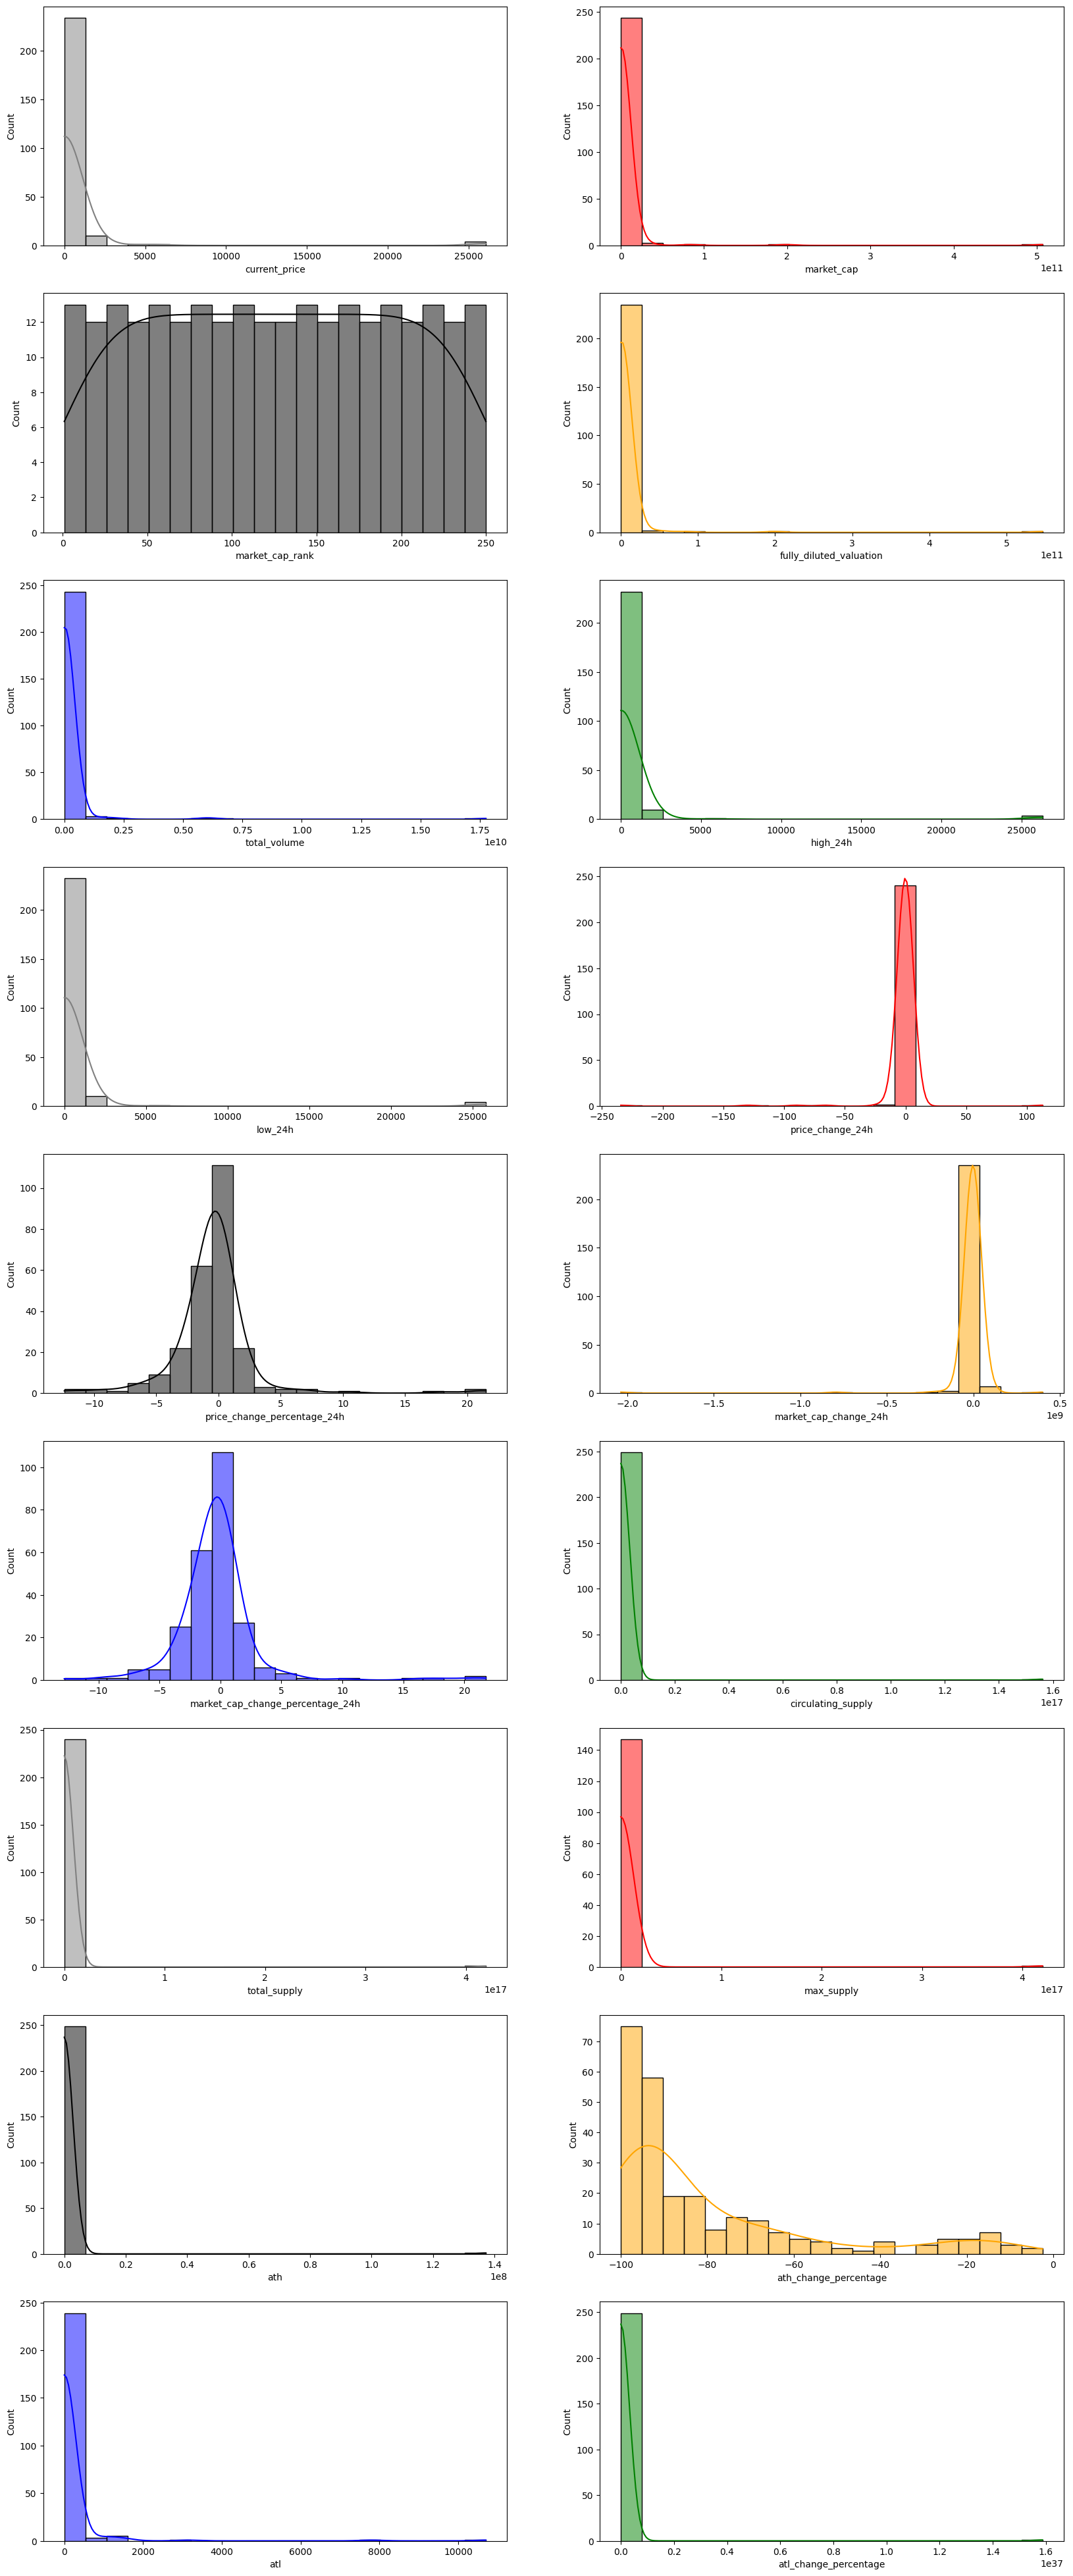

In [48]:
histplots(mercado_monedas[['current_price', 'market_cap', 'market_cap_rank',
       'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h',
       'price_change_24h', 'price_change_percentage_24h',
       'market_cap_change_24h', 'market_cap_change_percentage_24h',
       'circulating_supply', 'total_supply', 'max_supply', 'ath',
       'ath_change_percentage', 'atl', 'atl_change_percentage']],['current_price', 'market_cap', 'market_cap_rank',
       'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h',
       'price_change_24h', 'price_change_percentage_24h',
       'market_cap_change_24h', 'market_cap_change_percentage_24h',
       'circulating_supply', 'total_supply', 'max_supply', 'ath',
       'ath_change_percentage', 'atl', 'atl_change_percentage'],["gray","red","black","orange","blue","green"]*3,9,2,20,50)

 - del grafico anterior se verifica que las variables **market_cap_rank ,price_change_percentage_24h ,market_cap_change_percentage_24h** siguen una distribucion normal, popr tanto se podria

In [49]:
# veamos el diagrama de caja por variable numerica
def boxplots(df,cols,p,nrows,ncols):


   fig, axs = plt.subplots(nrows, ncols, figsize=(20, 50))
   for ind, col in enumerate(cols):
        i = math.floor(ind/ncols)
        j = ind - i*ncols
        #sns.histplot(data=df, x=col, kde=True, color=p[ind],bins=20, ax=axs[i,j])
        sns.boxplot(x=df[col],color=p[ind],orient='v', ax=axs[i,j]).grid()


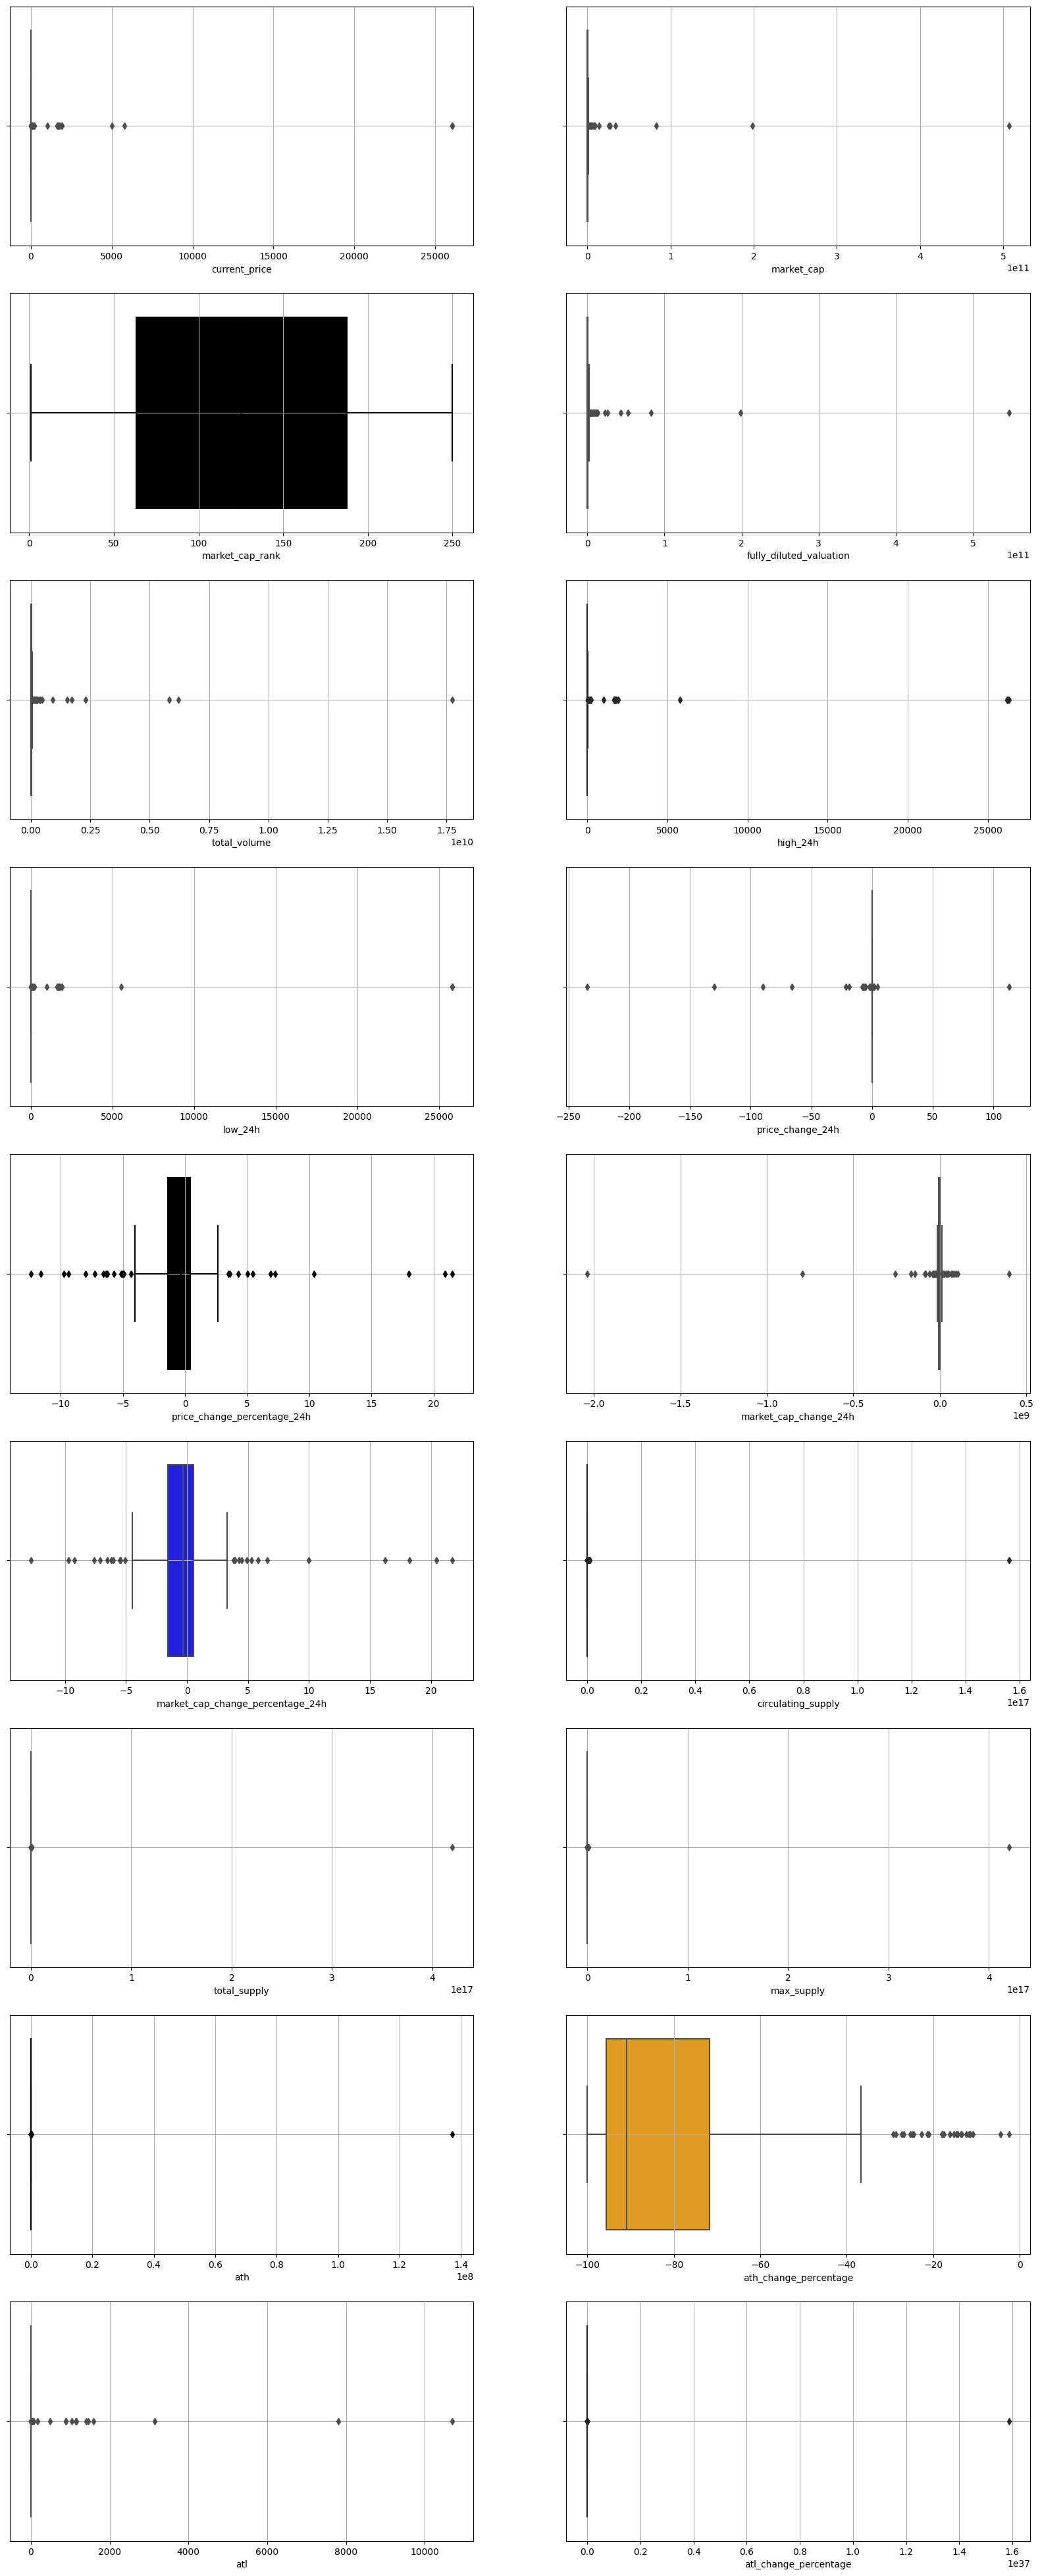

In [50]:
boxplots(mercado_monedas[['current_price', 'market_cap', 'market_cap_rank',
       'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h',
       'price_change_24h', 'price_change_percentage_24h',
       'market_cap_change_24h', 'market_cap_change_percentage_24h',
       'circulating_supply', 'total_supply', 'max_supply', 'ath',
       'ath_change_percentage', 'atl', 'atl_change_percentage']],['current_price', 'market_cap', 'market_cap_rank',
       'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h',
       'price_change_24h', 'price_change_percentage_24h',
       'market_cap_change_24h', 'market_cap_change_percentage_24h',
       'circulating_supply', 'total_supply', 'max_supply', 'ath',
       'ath_change_percentage', 'atl', 'atl_change_percentage'],["gray","red","black","orange","blue","green"]*3,9,2)

 -  del grafico de caja se observa que en  market_cap_rank no existe outliers y tiene una distribucion muy cercana a la distribucion normal por tanto es una variable que puede adapatarse a una funcion que depende de media y desviacion estandar y realizacion de pruebas estadisticas



- Los inversores hacen suposiciones sobre los rendimientos futuros esperados basándose en la distribución de probabilidad normal de los rendimientos pasados ​​de una acción. Si bien el uso de una curva de campana se presta para representar una distribución de probabilidad normal, la representación gráfica de una curva de campana también se puede utilizar para determinar las cuatro etapas de un ciclo de mercado y el mejor momento para entrar y salir del mercado.

 - KPIS :el crecimiento promedio esperado más (2) la volatilidad del crecimiento.

In [51]:
#criptomonedas con mayor capitalizacion de mercado
mercado_monedas[['id','current_price','market_cap','total_volume']].rename(columns={'id':'id_criptomoneda','current_price':'precio_actual','market_cap':'capitalizacion_de_mercado','total_volume':'volumen_total'}).sort_values('capitalizacion_de_mercado',ascending=False).reset_index(drop=True).head(7)

,id_criptomoneda,precio_actual,capitalizacion_de_mercado,volumen_total
0,bitcoin,26045.000000,506809645263,6.217403e+09
1,ethereum,1652.580000,198635603127,5.836677e+09
2,tether,0.999411,82782219257,1.775110e+10
3,binancecoin,218.330000,33573123024,3.780386e+08
4,ripple,0.524329,27771845052,9.239819e+08
5,usd-coin,1.000000,25952657867,2.290163e+09
6,staked-ether,1652.290000,13844279436,2.067053e+07


In [52]:
# diagrama de barras
def multiple_barplot(df, cols):
    num_plots = len(cols)
    num_cols = 2
    num_rows = 9
    fig, axs = plt.subplots(num_rows, num_cols,  figsize=(20, 40))
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        if num_rows == 1:
            if num_cols == 1:
                sns.barplot(data=df[['id criptomoneda',col]].sort_values(col,ascending=False).reset_index(drop=True).head(10),x=col,y='id criptomoneda',orient='h',log=True, ax=axs)
            else:
                sns.barplot(data=df[['id criptomoneda',col]].sort_values(col,ascending=False).reset_index(drop=True).head(10),x=col,y='id criptomoneda',orient='h',log=True, ax=axs[j])
        else:
            sns.barplot(data=df[['id criptomoneda',col]].sort_values(col,ascending=False).reset_index(drop=True).head(10),x=col,y='id criptomoneda',orient='h',log=True, ax=axs[i, j])


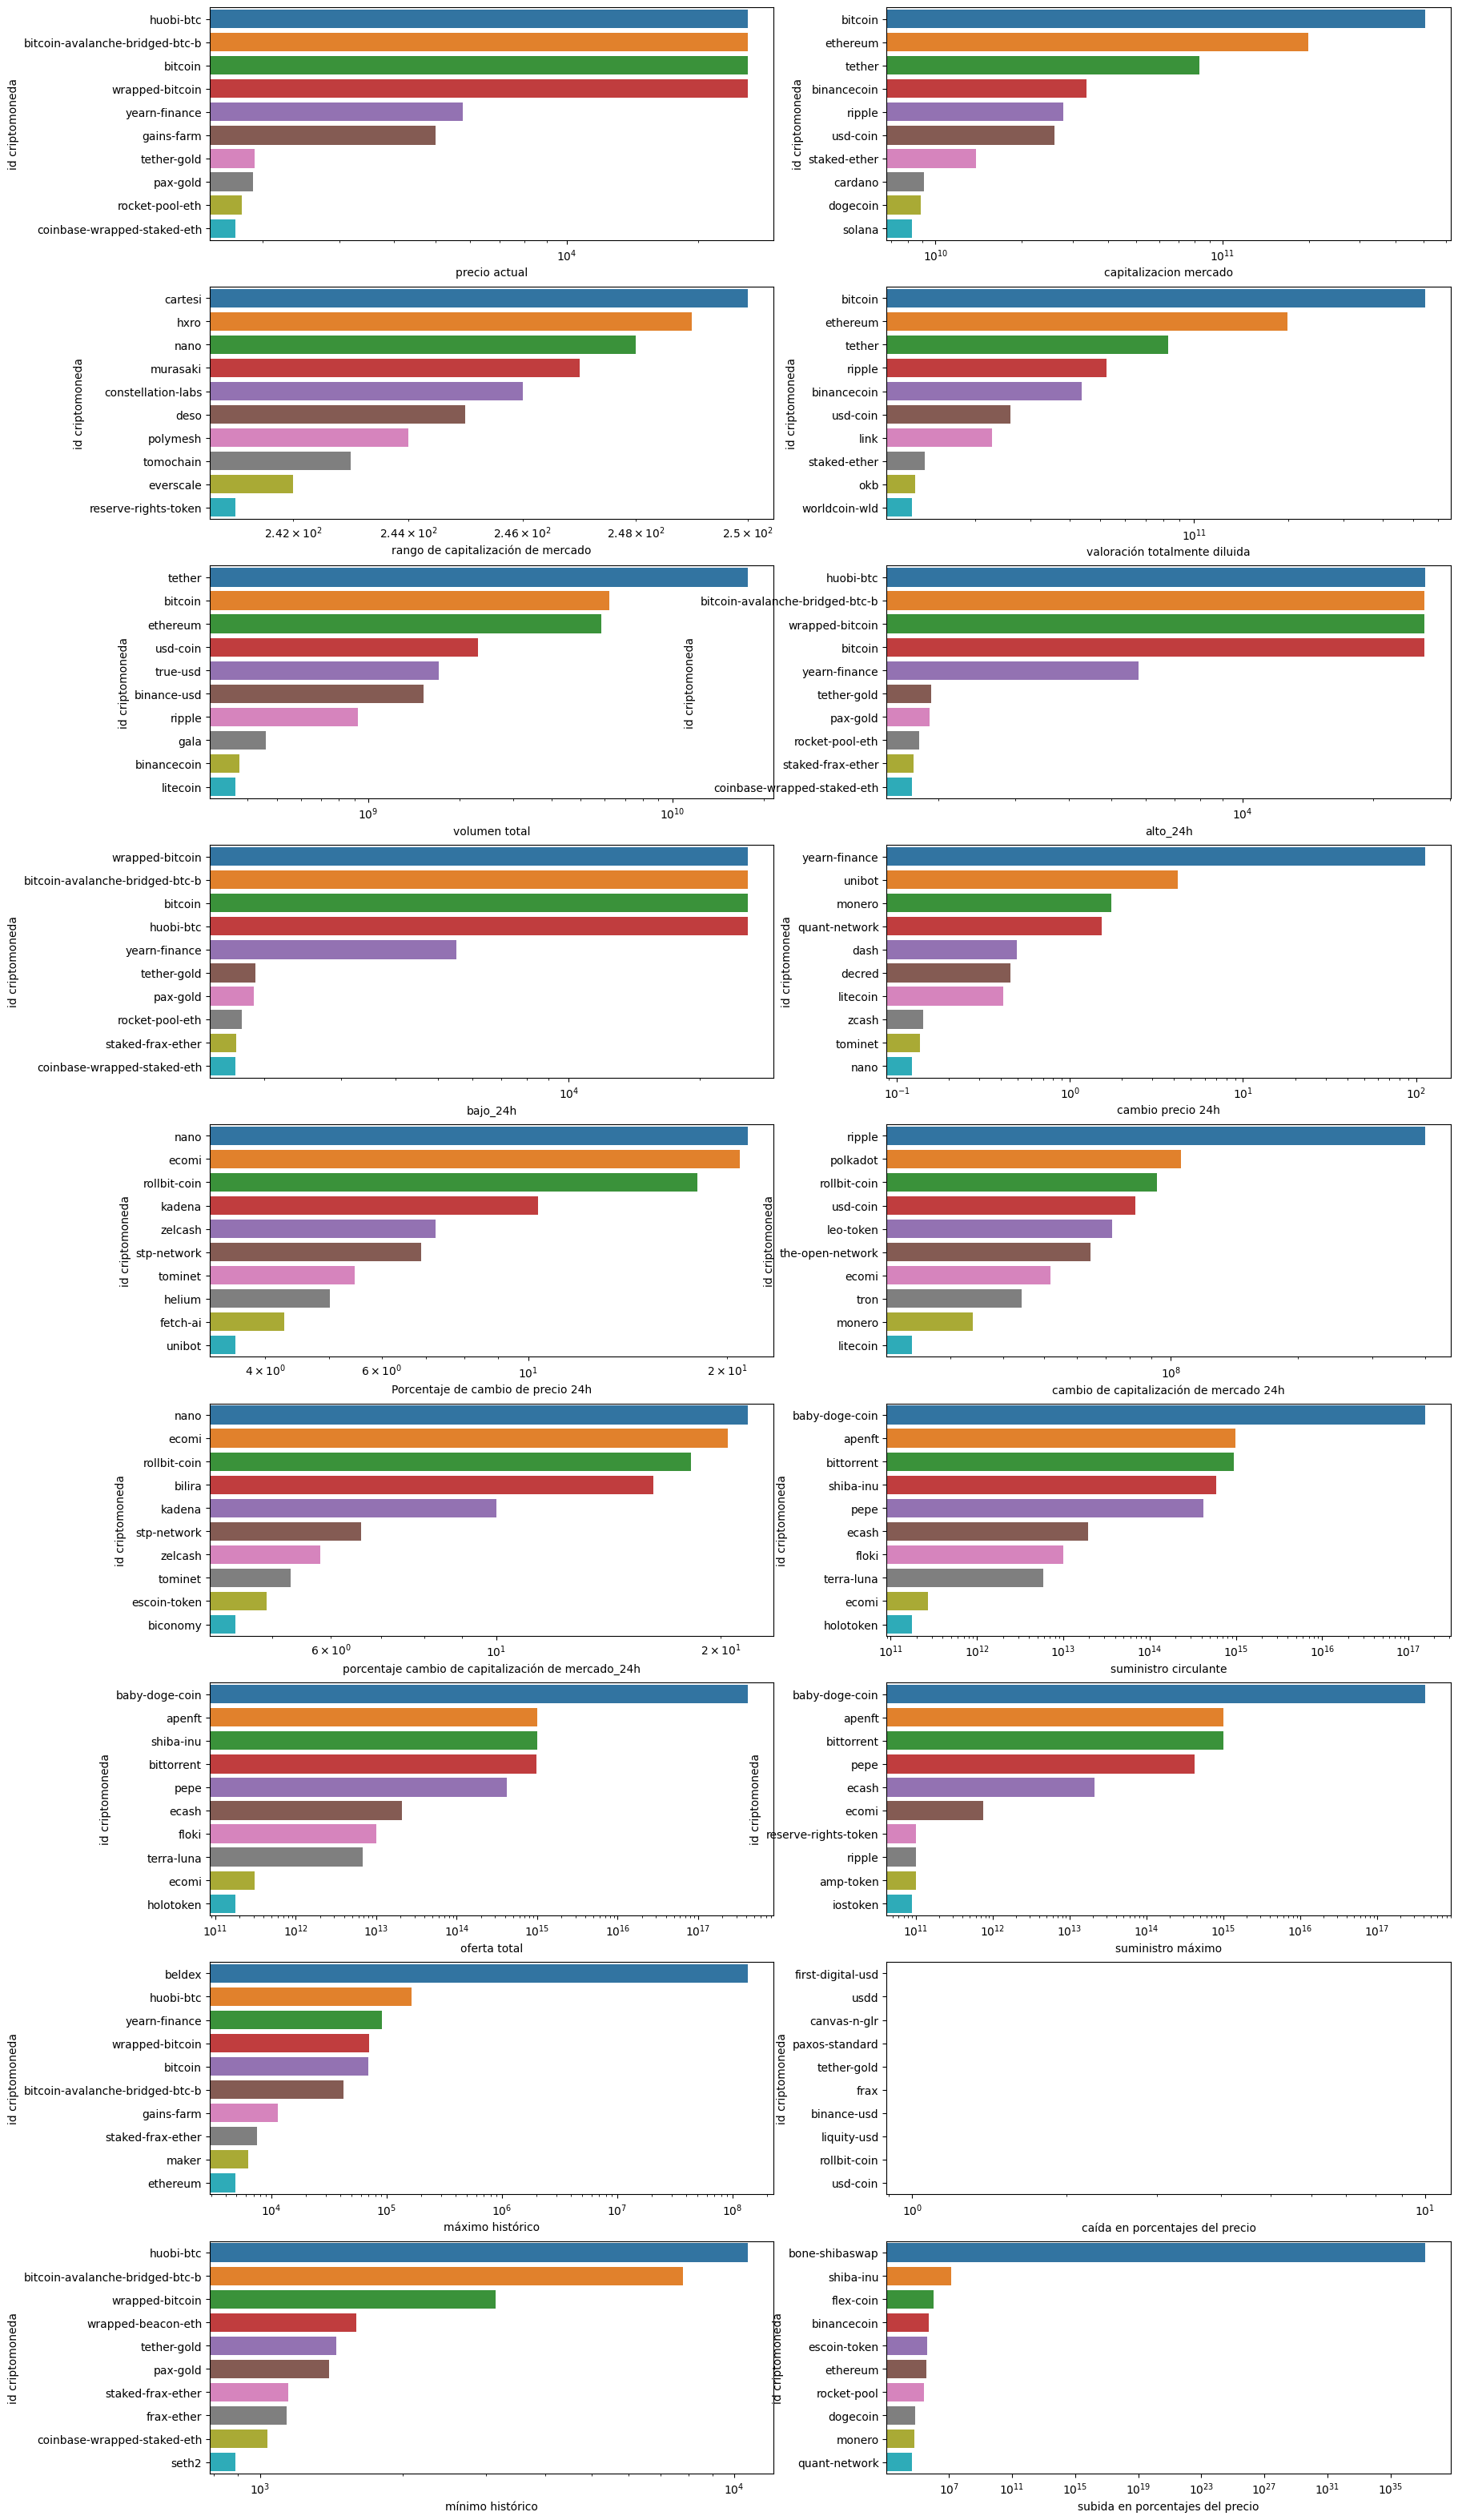

In [53]:
multiple_barplot(mercado_monedas[['id','current_price', 'market_cap', 'market_cap_rank','fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h',
                             'price_change_24h', 'price_change_percentage_24h','market_cap_change_24h', 'market_cap_change_percentage_24h',
                              'circulating_supply', 'total_supply', 'max_supply', 'ath','ath_change_percentage', 'atl', 'atl_change_percentage']].rename(columns={
                              'id':'id criptomoneda','current_price':'precio actual','market_cap':'capitalizacion mercado','market_cap_rank':'rango de capitalización de mercado',
                              'fully_diluted_valuation':'valoración totalmente diluida', 'total_volume':'volumen total','high_24h':'alto_24h','low_24h':'bajo_24h',
                              'price_change_24h':'cambio precio 24h','price_change_percentage_24h':'Porcentaje de cambio de precio 24h','market_cap_change_24h': 'cambio de capitalización de mercado 24h',
                              'market_cap_change_percentage_24h':'porcentaje cambio de capitalización de mercado_24h','circulating_supply':'suministro circulante','total_supply':'oferta total',
                              'max_supply':'suministro máximo','ath':'máximo histórico','ath_change_percentage':'caída en porcentajes del precio','atl':'mínimo histórico','atl_change_percentage':'subida en porcentajes del precio'})
                               ,['precio actual', 'capitalizacion mercado', 'rango de capitalización de mercado','valoración totalmente diluida','volumen total' , 'alto_24h', 'bajo_24h',
                                 'cambio precio 24h', 'Porcentaje de cambio de precio 24h','cambio de capitalización de mercado 24h',
                                 'porcentaje cambio de capitalización de mercado_24h','suministro circulante', 'oferta total', 'suministro máximo',
                                 'máximo histórico','caída en porcentajes del precio', 'mínimo histórico', 'subida en porcentajes del precio'])

-  de los graficos anteripores las 10 primeras criptomonedas con mayores en valores por variable : **'precio actual', 'capitalizacion mercado', 'rango de capitalización de mercado','valoración totalmente diluida','volumen total' , 'alto_24h', 'bajo_24h','cambio precio 24h', 'Porcentaje de cambio de precio 24h','cambio de capitalización de mercado 24h','porcentaje cambio de capitalización de mercado_24h','suministro circulante', 'oferta total', 'suministro máximo','máximo histórico','caída en porcentajes del precio', 'mínimo histórico', 'subida en porcentajes del precio'** DESTAQUEMOS LAS VARIABLES QUE SIGUEN UNA DISTRIBUCION NORMAL

In [54]:
# analisis por  capitalizacion de mercado y  volumen de 24 horas
print(mercado_monedas[['id','current_price','market_cap','total_volume']].rename(columns={'id':'id_criptomoneda','current_price':'precio_actual','market_cap':'capitalizacion_de_mercado','total_volume':'volumen_total'}).sort_values('capitalizacion_de_mercado',ascending=False).reset_index(drop=True).head(5))
print('-----------------------------------------------------------------------------')
print(mercado_monedas[['id','current_price','market_cap','total_volume']].rename(columns={'id':'id_criptomoneda','current_price':'precio_actual','market_cap':'capitalizacion_de_mercado','total_volume':'volumen_total'}).sort_values('volumen_total',ascending=False).reset_index(drop=True).head(5))

  id_criptomoneda  precio_actual  capitalizacion_de_mercado  volumen_total
0         bitcoin   26045.000000               506809645263   6.217403e+09
1        ethereum    1652.580000               198635603127   5.836677e+09
2          tether       0.999411                82782219257   1.775110e+10
3     binancecoin     218.330000                33573123024   3.780386e+08
4          ripple       0.524329                27771845052   9.239819e+08
-----------------------------------------------------------------------------
  id_criptomoneda  precio_actual  capitalizacion_de_mercado  volumen_total
0          tether       0.999411                82782219257   1.775110e+10
1         bitcoin   26045.000000               506809645263   6.217403e+09
2        ethereum    1652.580000               198635603127   5.836677e+09
3        usd-coin       1.000000                25952657867   2.290163e+09
4        true-usd       0.998981                 2903662598   1.708440e+09


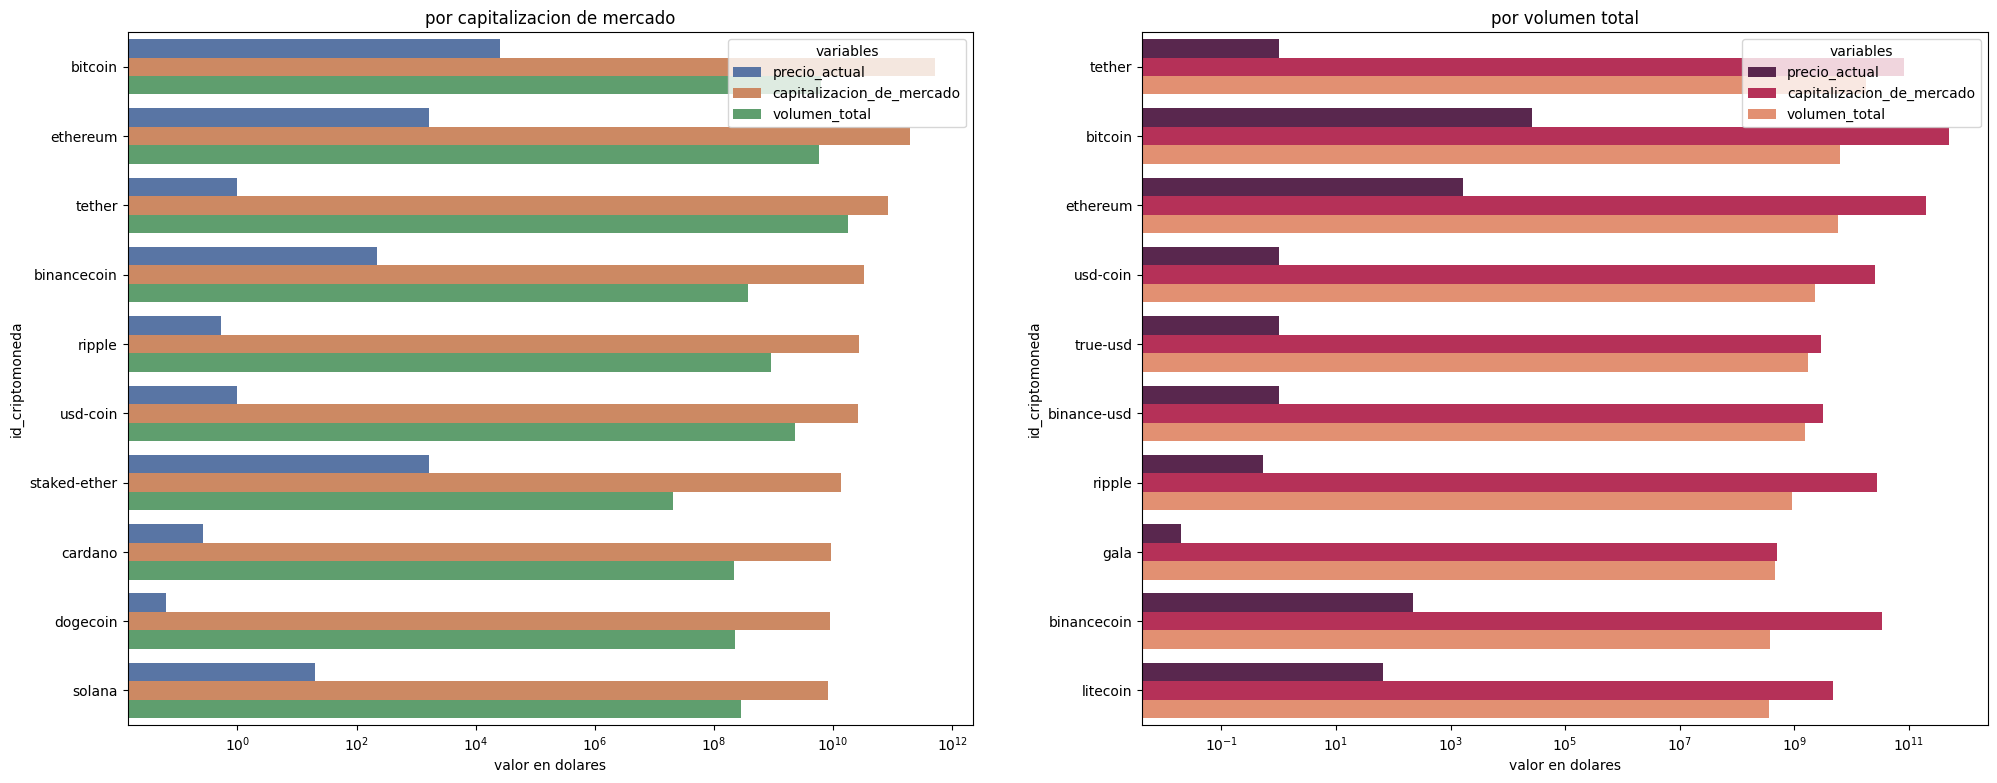

In [55]:
# analisis por  capitalizacion de mercado y  volumen de 24 horas
# top 10 criptomonedas con mayor  capitalizacion de mercado y  volumen de 24 horas

da2=pd.melt(mercado_monedas[['id','current_price','market_cap','total_volume']].rename(columns={'id':'id_criptomoneda','current_price':'precio_actual','market_cap':
                                                                                          'capitalizacion_de_mercado','total_volume':'volumen_total'})
                                                                       .sort_values('capitalizacion_de_mercado',ascending=False).reset_index(drop=True).head(10),
                                                                        id_vars="id_criptomoneda", var_name="variables",value_name="valor en dolares")
da3=pd.melt(mercado_monedas[['id','current_price','market_cap','total_volume']].rename(columns={'id':'id_criptomoneda','current_price':'precio_actual','market_cap':'capitalizacion_de_mercado','total_volume':'volumen_total'}).sort_values('volumen_total',ascending=False).reset_index(drop=True).head(10),
                           id_vars="id_criptomoneda", var_name="variables",value_name="valor en dolares")
fig, axs = plt.subplots(ncols=2,  figsize=(24, 9))
sns.barplot(data=da2, x='valor en dolares',y='id_criptomoneda',hue='variables',orient='h',palette="deep",log=True,ax=axs[0]).set_title('por capitalizacion de mercado')
sns.barplot(data=da3, x='valor en dolares', y= 'id_criptomoneda',hue='variables',orient='h',palette="rocket",log=True,ax=axs[1]).set_title('por volumen total')
plt.show()

 -   la descripcion grafica de las top 10 criptomonedas ordenadas de mayor a menor por capitalizacion de mercado (grafica 1) y por volumen (grafica 2)

## Analisi multivariado

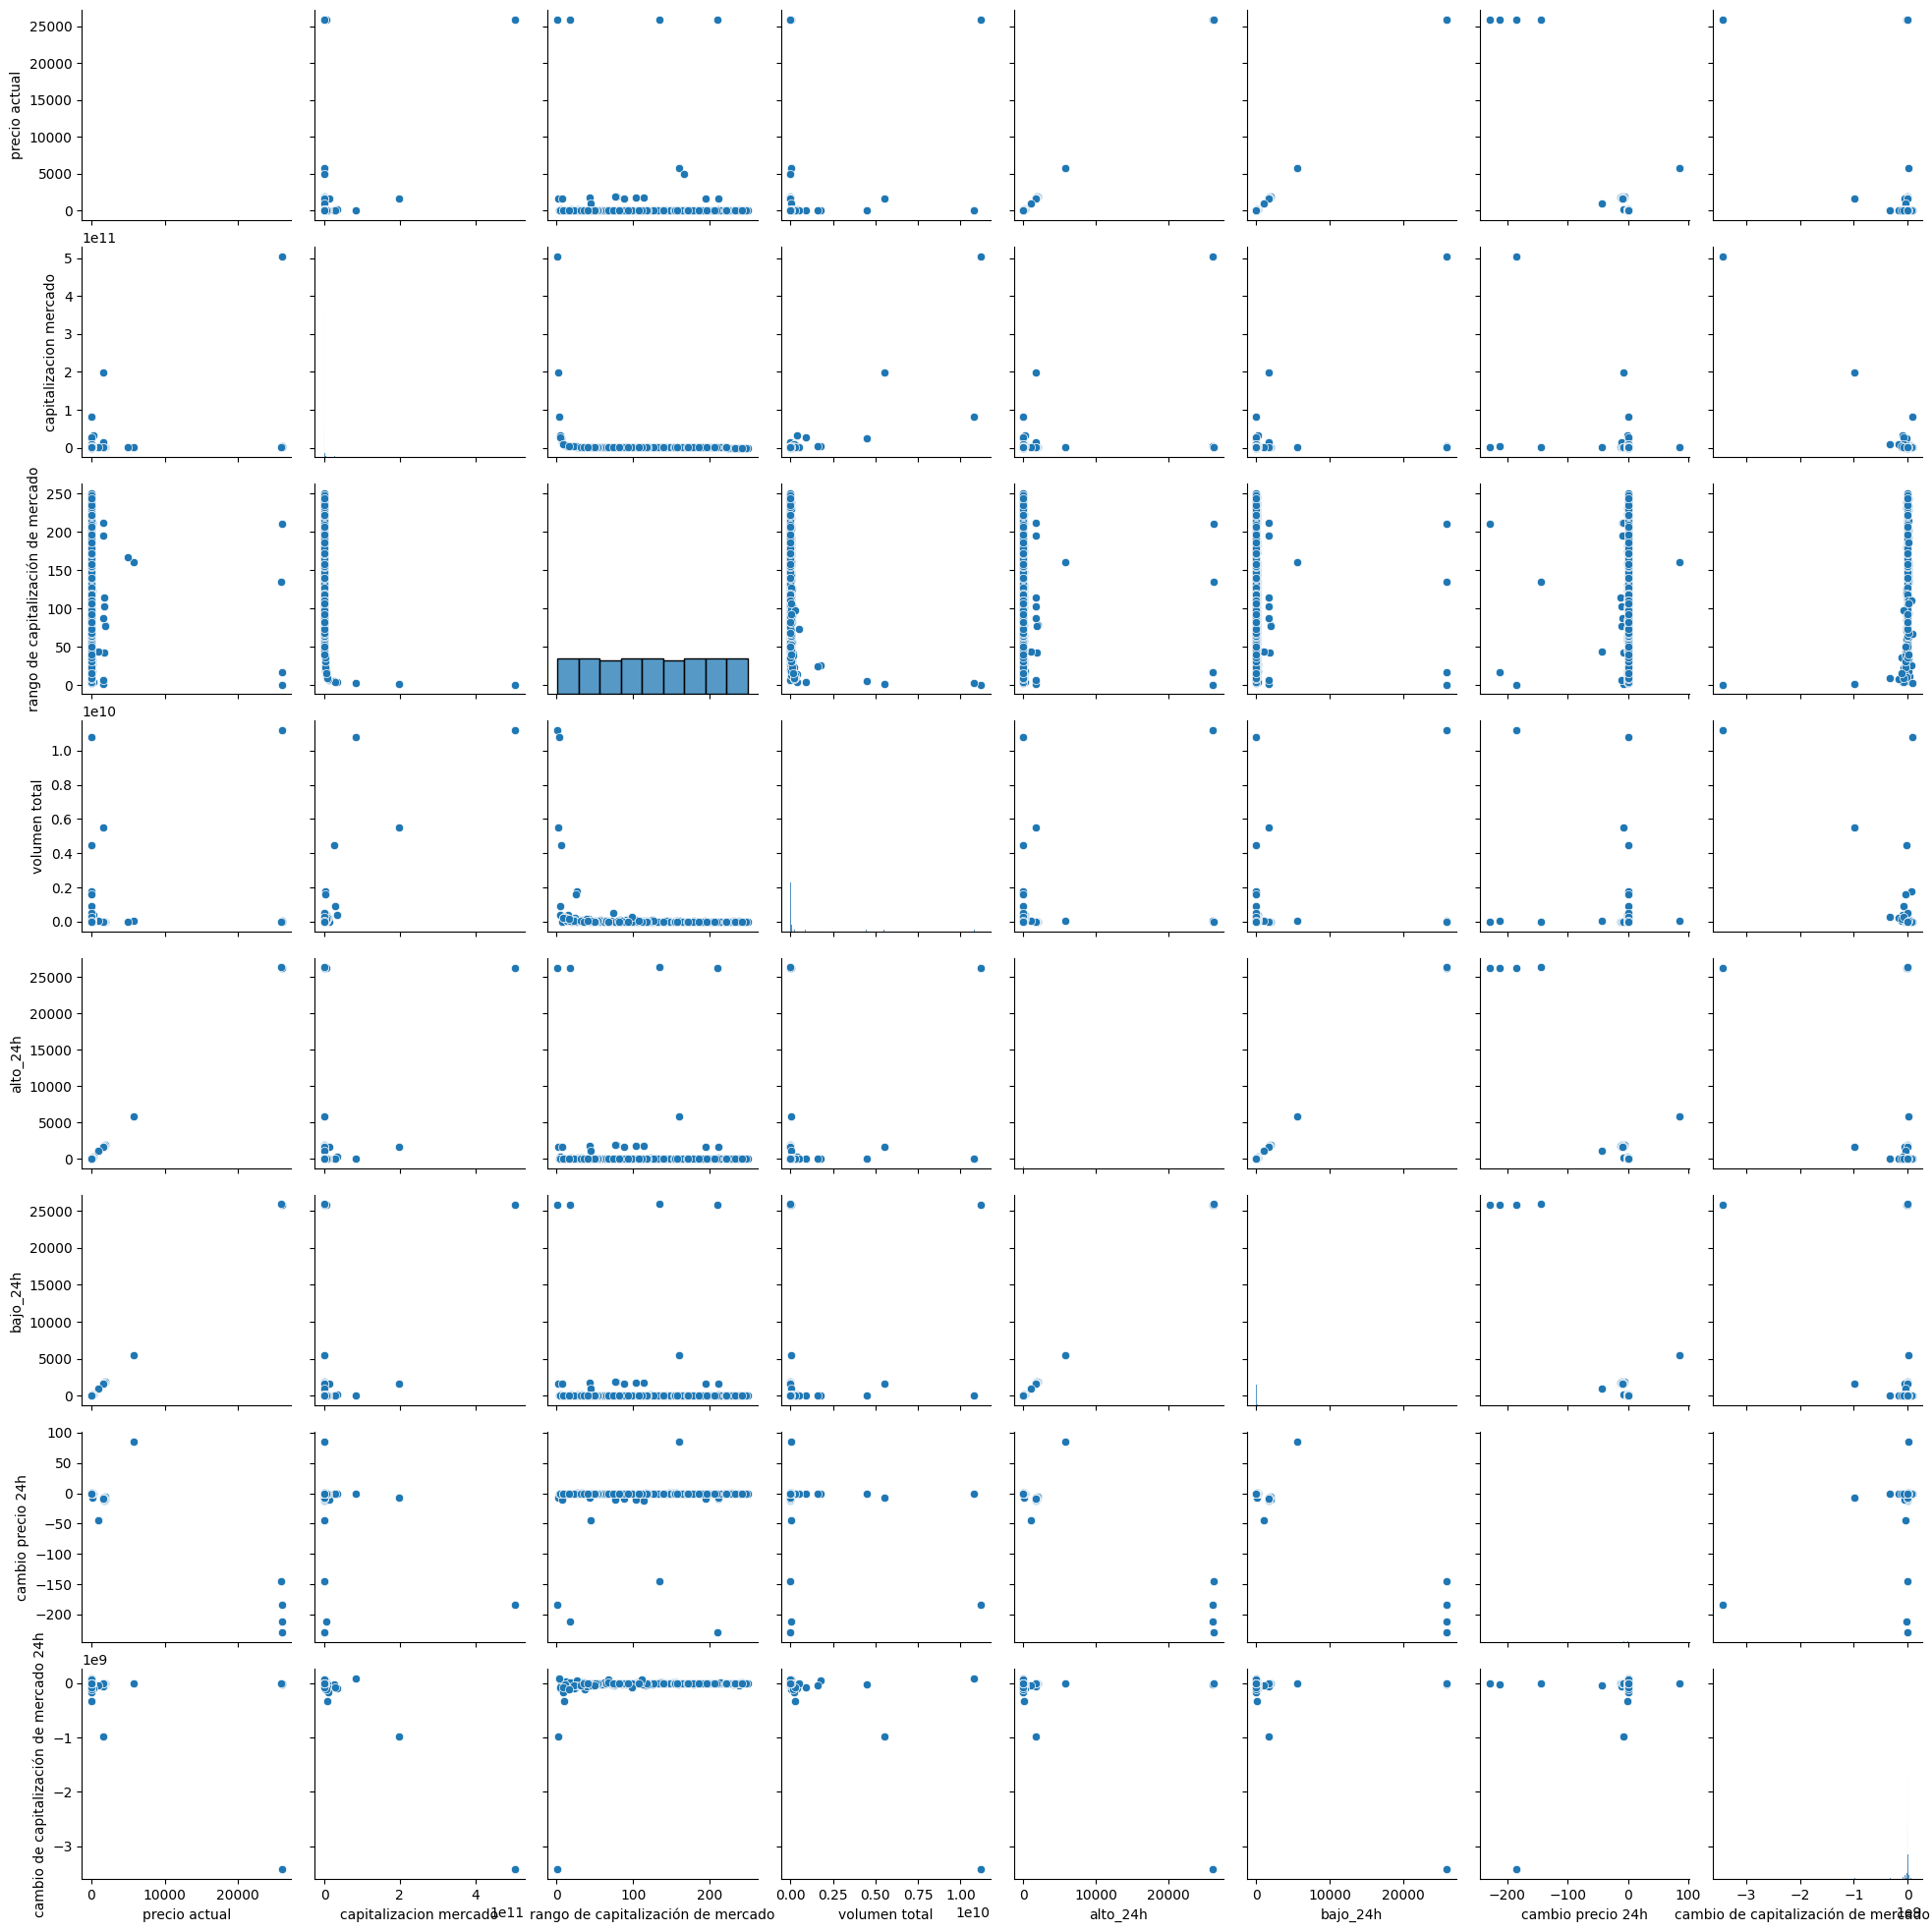

In [408]:
# Para cada par de variables numéricas, generemos un scatterplot y en la diagonal grafica la distribucion de esos valores.

sns.pairplot(data=mercado_monedas[['current_price', 'market_cap', 'market_cap_rank', 'total_volume', 'high_24h', 'low_24h',
                             'price_change_24h','market_cap_change_24h']].rename(columns={
                              'current_price':'precio actual','market_cap':'capitalizacion mercado','market_cap_rank':'rango de capitalización de mercado',
                               'total_volume':'volumen total','high_24h':'alto_24h','low_24h':'bajo_24h',
                              'price_change_24h':'cambio precio 24h','market_cap_change_24h': 'cambio de capitalización de mercado 24h',
                              }))

<Axes: >

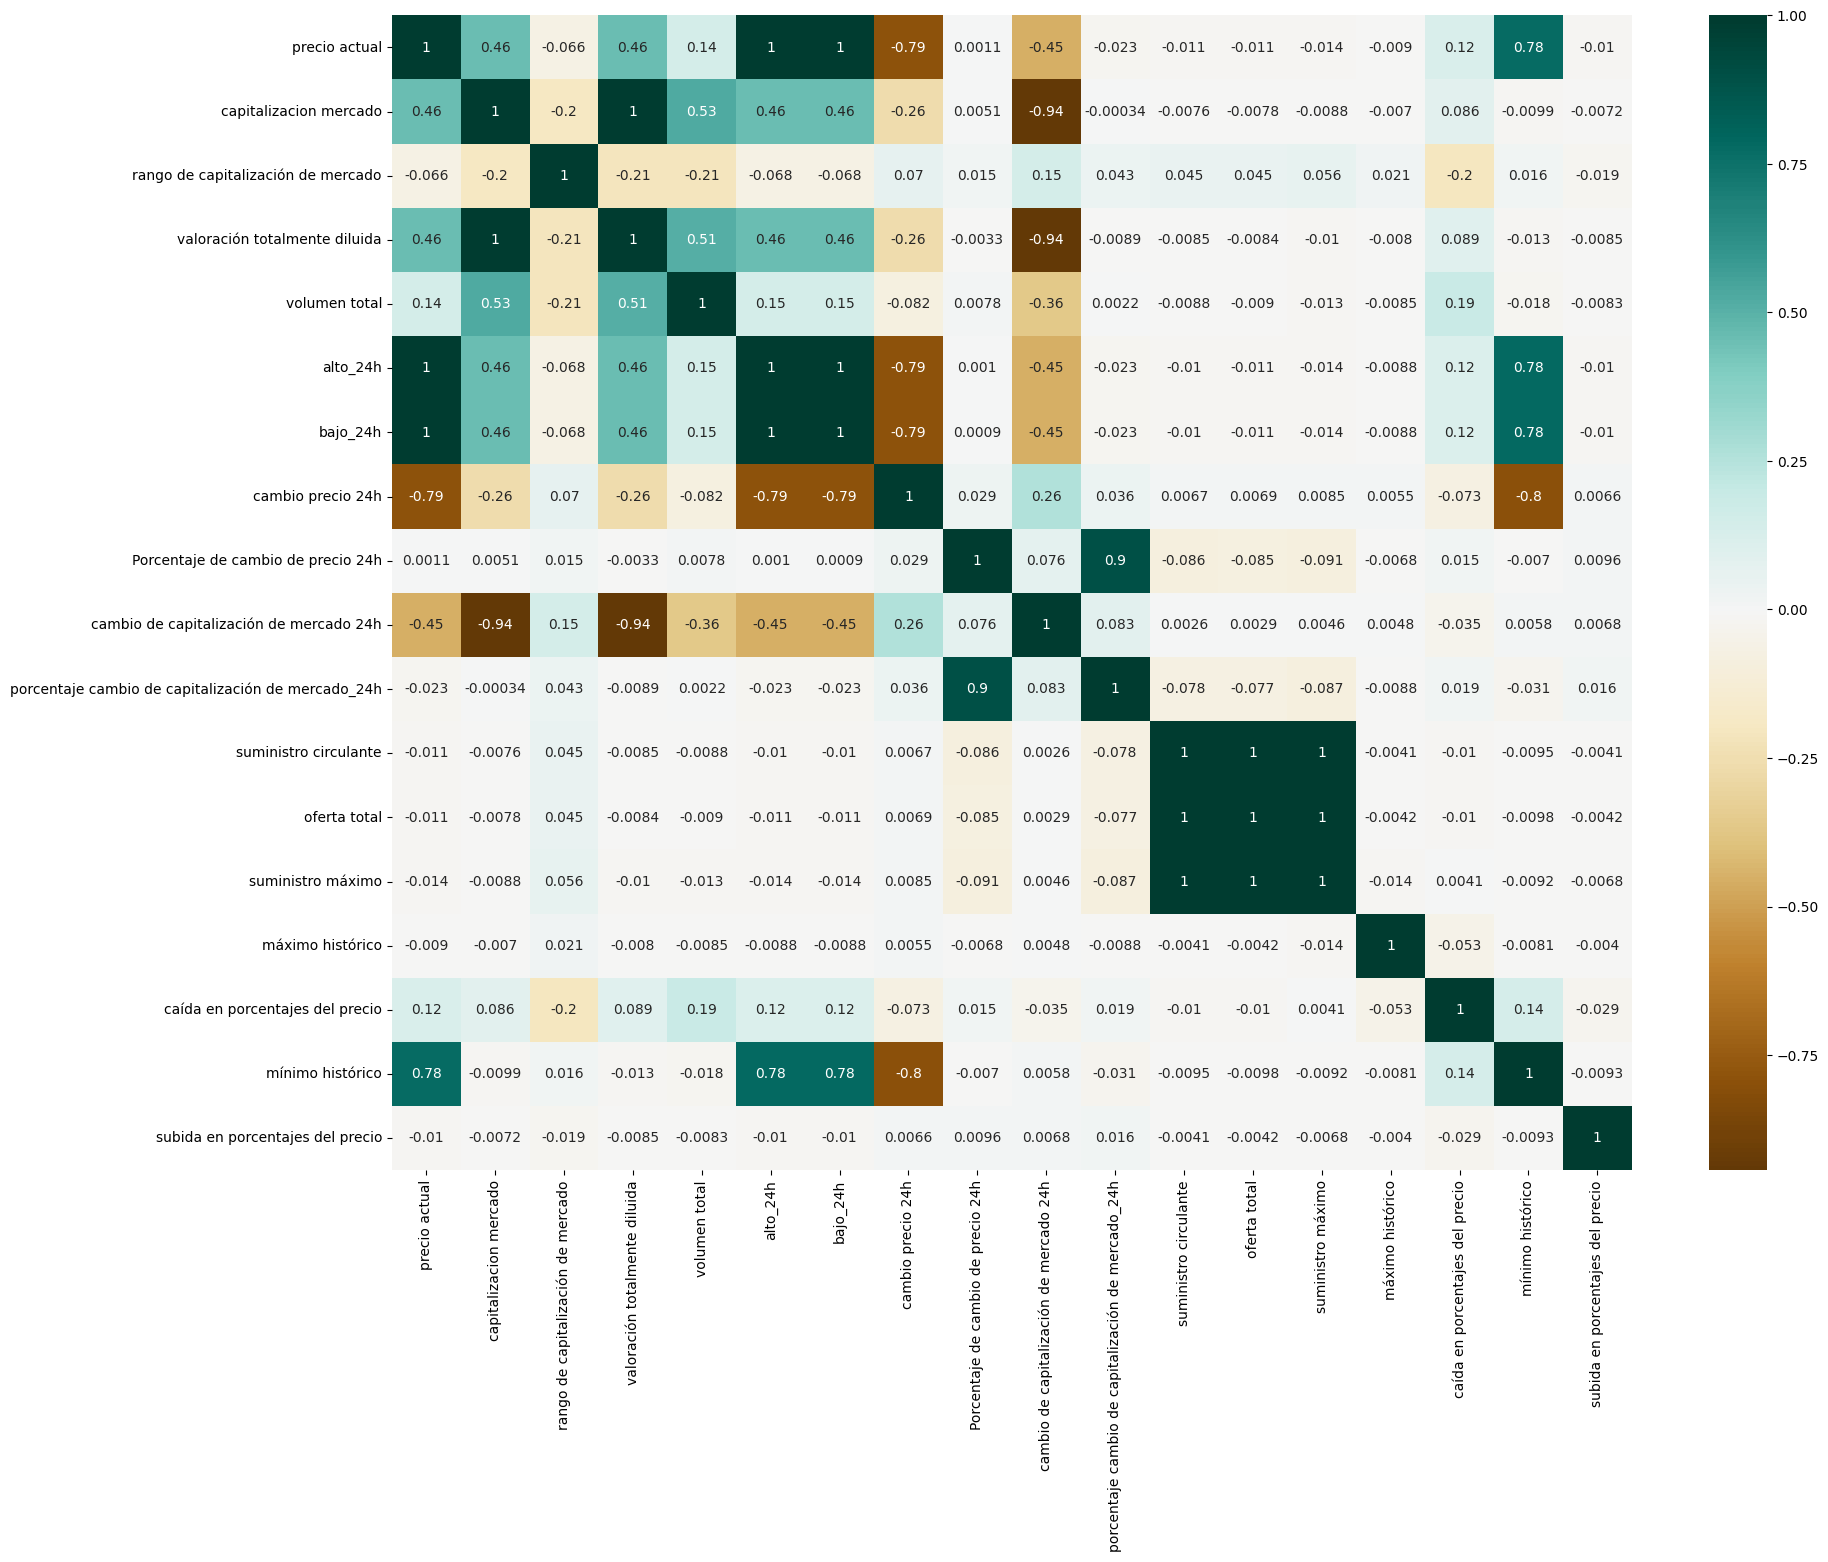

In [56]:
#heatmap de variables numericas  : observacion las correlaciones de las variables numericas
df=mercado_monedas[['current_price', 'market_cap', 'market_cap_rank','fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h',
                             'price_change_24h', 'price_change_percentage_24h','market_cap_change_24h', 'market_cap_change_percentage_24h',
                              'circulating_supply', 'total_supply', 'max_supply', 'ath','ath_change_percentage', 'atl', 'atl_change_percentage']].rename(columns={
                              'current_price':'precio actual','market_cap':'capitalizacion mercado','market_cap_rank':'rango de capitalización de mercado',
                              'fully_diluted_valuation':'valoración totalmente diluida', 'total_volume':'volumen total','high_24h':'alto_24h','low_24h':'bajo_24h',
                              'price_change_24h':'cambio precio 24h','price_change_percentage_24h':'Porcentaje de cambio de precio 24h','market_cap_change_24h': 'cambio de capitalización de mercado 24h',
                              'market_cap_change_percentage_24h':'porcentaje cambio de capitalización de mercado_24h','circulating_supply':'suministro circulante','total_supply':'oferta total',
                              'max_supply':'suministro máximo','ath':'máximo histórico','ath_change_percentage':'caída en porcentajes del precio','atl':'mínimo histórico','atl_change_percentage':'subida en porcentajes del precio'})
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

 - del mapa de calor se puede  observar que
   - **suministro circulante y suministro maximo** tiene correlacion perfecta
   - **suministro circulante y suministro total** tiene correlacion perfecta
   - **bajo 24hr y alto 24hr** tiene correlacion perfecta
   - **precio actual y alto 24hr** tiene corrrelacion perfecta
   - **precio actual y bajo 24hr** tiene corrrelacion perfecta
   - **capitalizacion de mercado y valoracion totalmente diluida** tiene correlacion perfecta
     - **precio actual y cambio precio 24 hr** tiene correlacion negativa muy fuerte
     - **capitalizacion de mercado y cambio de capitalizacion de mercado 24 hr** tiene correlacion negativa muy fuerte
     - **capitalizacion de mercado y volumen total** tiene correlacion muy fuerte
     - **minimo historico y precio actual** tiene una correlacion fuerte
    
  se puede concluir que hay variables que pueden ser reemplazadas por otras cuando existen una correlacion fuerte o muy fuerte

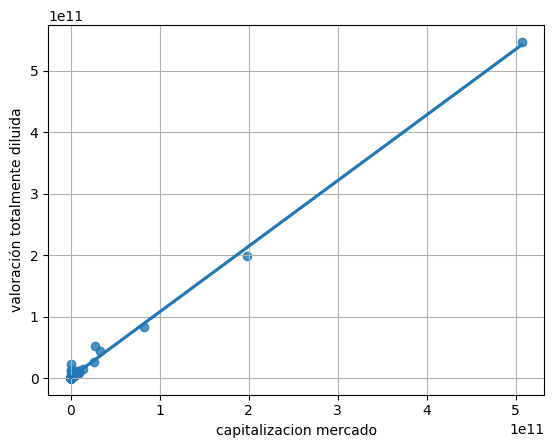

In [57]:
# scaterplot entre capitalizacion mercado y valoracion totalemnte diluida, tiene una correlacion perfecta .

ax = sns.regplot(x='capitalizacion mercado',y='valoración totalmente diluida', data=df,ci=None)
plt.grid()

# CATEGORIES



In [58]:

# categorías de criptomonedas, monedas de privacidad, monedas estables, juegos de azar, tokens lp, etc
coinCategoriesList = pd.DataFrame(cg.get_coins_categories_list())
coinCategoriesList.head(4)

,category_id,name
0,aave-tokens,Aave Tokens
1,algorand-ecosystem,Algorand Ecosystem
2,alleged-sec-securities,Alleged SEC Securities
3,analytics,Analytics


In [59]:
#los datos sobre categorías de criptomonedas
#enumerar todas las categorias con datos de mercado
dato_por_categoria = pd.DataFrame(cg.get_coins_categories(per_page=1250)) #order = 'market_cap_desc'
dato_por_categoria[['id','market_cap','market_cap_change_24h','volume_24h']].sort_values(by='market_cap',ascending=False).reset_index(drop=True).head(5) #elecion de columnas relevantes


,id,market_cap,market_cap_change_24h,volume_24h
0,layer-1,7.889460e+11,-0.341832,1.875243e+10
1,smart-contract-platform,3.050261e+11,-0.376173,9.846246e+09
2,stablecoins,1.242462e+11,0.060478,2.623949e+10
3,alleged-sec-securities,8.261522e+10,-0.501284,4.309301e+09
4,exchange-based-tokens,5.307864e+10,-0.091064,9.109507e+08


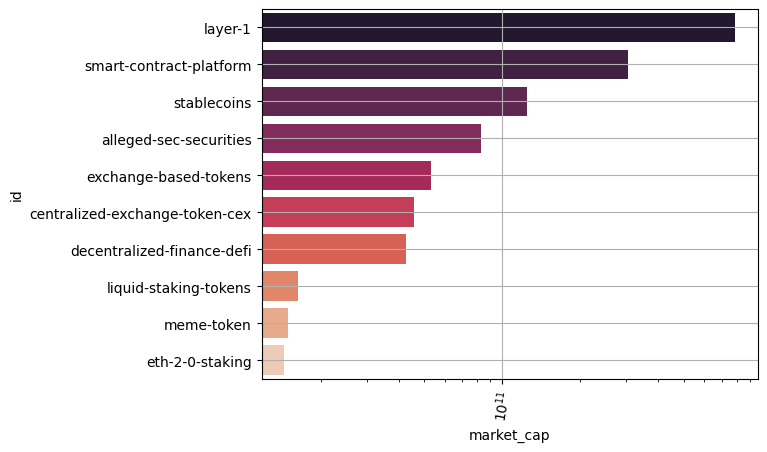

In [60]:
# las principales 15 categorías criptográficas con mayor capitalización de mercado
t=sns.barplot(data=dato_por_categoria[['id','market_cap']].sort_values(by='market_cap',ascending=False).reset_index(drop=True).head(10), x="market_cap", y="id",palette="rocket",orient='h')
t.set_xticklabels(t.get_xticklabels(),rotation=80)
plt.xscale('log')
plt.grid()
plt.show()

### conclusiones

- **layer-1** es la categoría criptográfica más grande por capitalización de mercado, que abarca los activos criptográficos más populares y ampliamente utilizados en el mercado actual. Estos incluyen Bitcoin, Ethereum y varios otros
- **smart-contract-platform** es la segunda categoría más grande por capitalización de mercado.

# intercambios de activos

In [61]:
#lista de todos los intercambios activos (Activo con volumenes de negociacion): plataformas que ayudan al inversor a vender o comprar en criptomonedas digitales
exchgList = cg.get_exchanges_list(per_page = 1250, page = 1)
intercambio_de_activo = pd.DataFrame.from_dict(exchgList)
intercambio_de_activo.head(5)

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10.0,1.0,198174.137051,134054.281701
1,gdax,Coinbase Exchange,2012.0,United States,,https://coinbase-consumer.sjv.io/coingecko,https://assets.coingecko.com/markets/images/23...,False,10.0,2.0,32451.595805,32451.595805
2,bybit_spot,Bybit,2018.0,British Virgin Islands,Bybit is a cryptocurrency exchange that offers...,https://www.bybit.com,https://assets.coingecko.com/markets/images/69...,False,10.0,3.0,30823.085700,30823.085700
3,huobi,Huobi,2013.0,Seychelles,,https://www.huobi.com,https://assets.coingecko.com/markets/images/25...,False,10.0,4.0,36035.568572,20185.944404
4,kraken,Kraken,2011.0,United States,,https://r.kraken.com/c/2223866/687155/10583,https://assets.coingecko.com/markets/images/29...,False,10.0,5.0,17892.757038,13376.126888


In [62]:
intercambio_de_activo.duplicated().value_counts() # no hay duplicados

False    250
dtype: int64

In [63]:
#descripcion estadistica sobre vaviables numericas
intercambio_de_activo.iloc[:,[8,9,10,11]].describe()

,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
count,249.000000,249.000000,250.000000,250.000000
mean,6.016064,125.000000,4143.281061,2840.183408
std,1.343947,72.024301,15217.675660,10058.860947
min,4.000000,1.000000,0.129728,0.000000
25%,5.000000,63.000000,6.130696,5.105897
50%,5.000000,125.000000,91.393822,79.042642
75%,7.000000,187.000000,1579.668031,967.229493
max,10.000000,249.000000,198174.137051,134054.281701


 - las variables **trust_score y trust_score_rank** segun la descripcion podrian seguir una distribucion normal ya que la media y la mediana tienden a tener el mismo valor , mientras que los demas tienden a tener sesgos

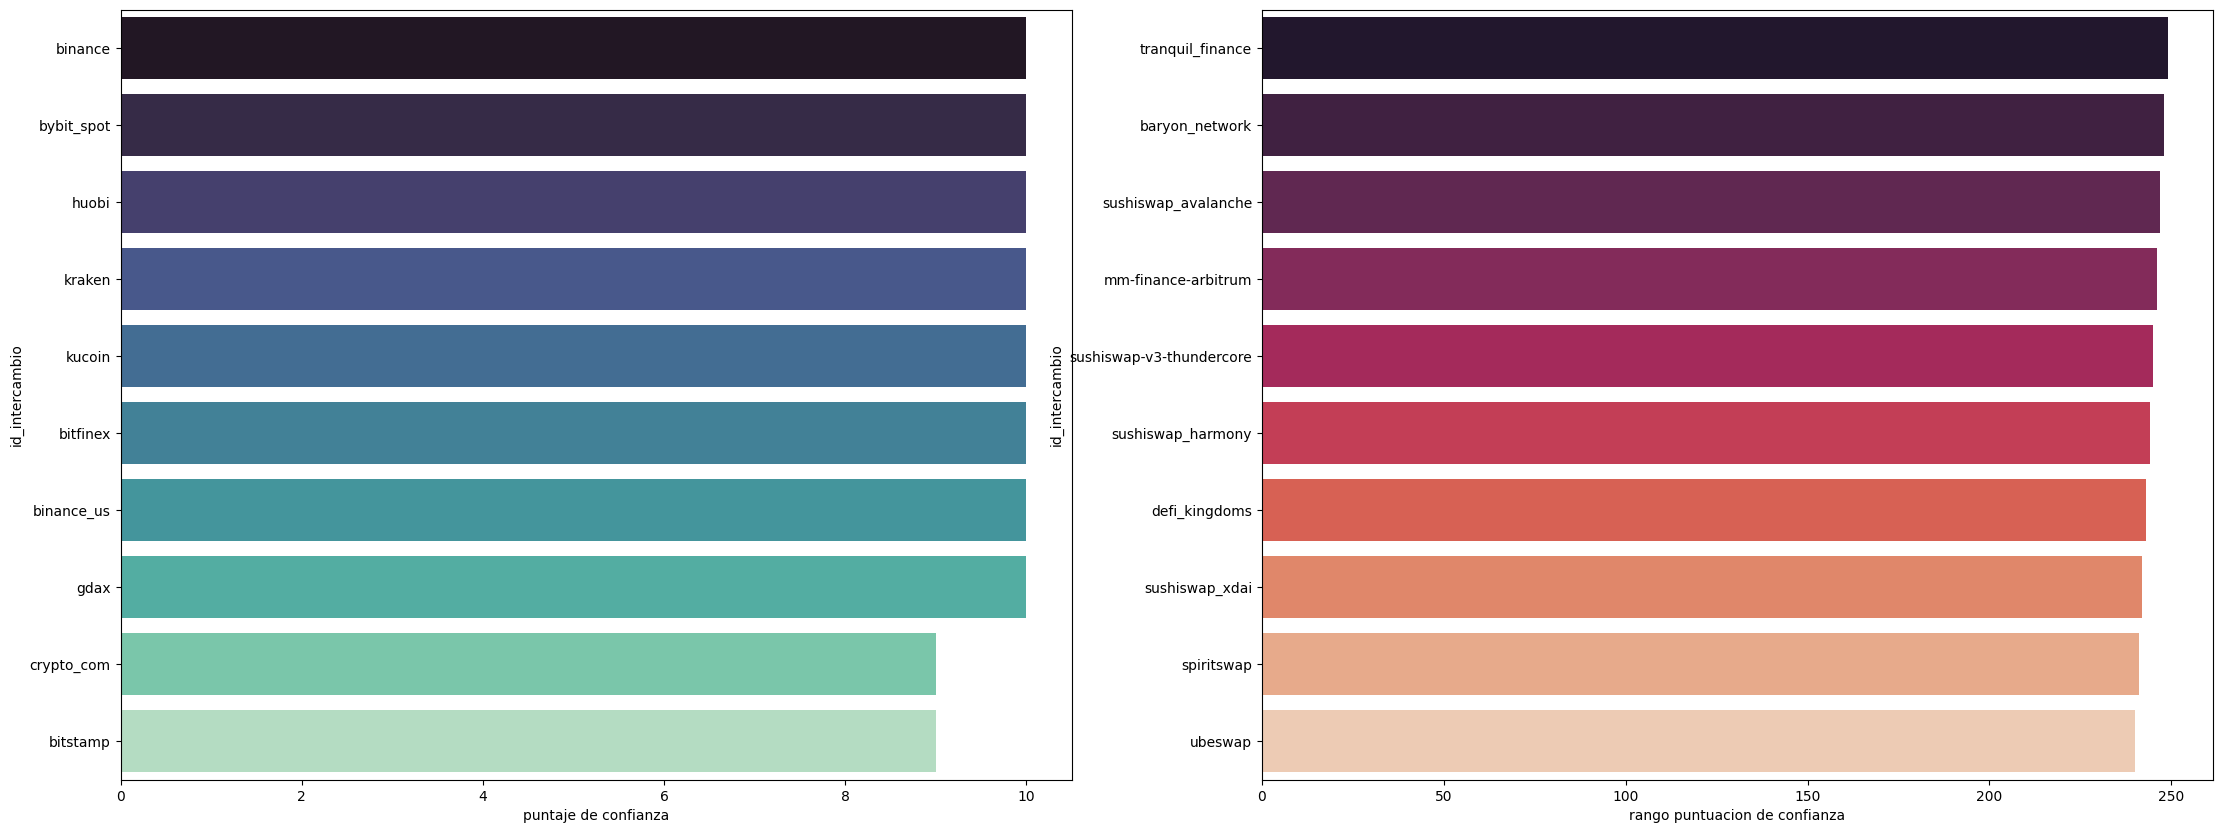

In [64]:
# plataformas de  intercambio de activos clasificados por puntaje de confianza las 12 primeras

da3=intercambio_de_activo[['id','trust_score']].sort_values('trust_score',ascending=False).reset_index(drop=True).head(10).rename(columns={'id':'id_intercambio','trust_score':'puntaje de confianza'})
da0=intercambio_de_activo[['id','trust_score_rank']].sort_values('trust_score_rank',ascending=False).reset_index(drop=True).head(10).rename(columns={'id':'id_intercambio','trust_score_rank':'rango puntuacion de confianza'})
fig, axs = plt.subplots(ncols=2,  figsize=(27, 10))
sns.barplot(data=da3, x='puntaje de confianza',y='id_intercambio',orient='h',palette="mako",ax=axs[0])#.set_xticklabels(sns.barplot(data=da2, x='capitalizacion_de_mercado_en dolares',y='id_de_la_criptomoneda',orient='h',palette="deep",log=True,ax=axs[0]).get_xticklabels(),rotation=20)
sns.barplot(data=da0, x='rango puntuacion de confianza', y= 'id_intercambio',orient='h',palette="rocket",ax=axs[1])#.set_xticklabels(sns.barplot(data=da1, x='precio_en_dolares', y='id_de_la_criptomoneda' ,orient='h',palette="rocket",log=True,ax=axs[1]).get_xticklabels(),rotation=20)
#plt.xscale('log')
plt.show()

 - **binance , byspot , huobit , kraken ,kucoin bitfinex, binance_us , gdax** intercambios de activos  con un puntaje de confianza mayor
 -  **tranquil_finance ,sushis_wap_avalanche , baryon network , mm-finance-arbitrum** con mayor rango de confianza
 - de aqui se puede seleccionar a los 10 primeros intercambio de activos para analizar

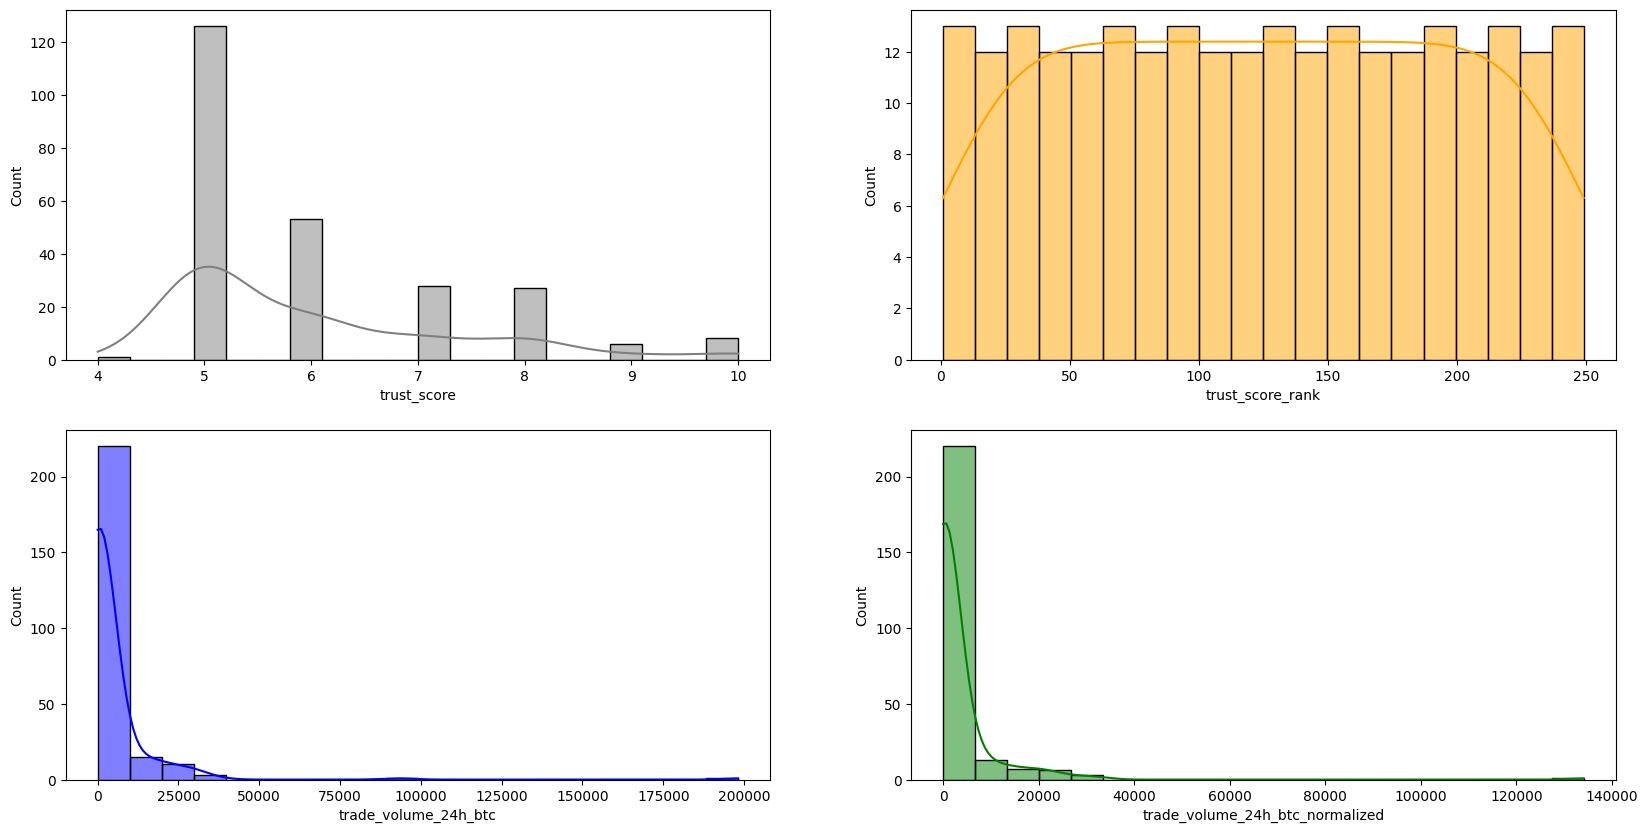

In [65]:
#hisplots para las variables numericas

histplots(intercambio_de_activo.iloc[:,[8,9,10,11]],['trust_score', 'trust_score_rank', 'trade_volume_24h_btc',
       'trade_volume_24h_btc_normalized'],["gray","orange","blue","green"],2,2,20,10)

In [66]:
# los id y nombres de los intercambios admitidos(no se requiere paginacion)
exchgIds = cg.get_exchanges_id_name_list()
lista_de_id_intercambios = pd.DataFrame.from_dict(exchgIds
                              )
lista_de_id_intercambios.head(3)

,id,name
0,1bch,1BCH
1,3xcalibur,3xcalibur
2,aave,Aave


In [67]:
# lista_de_id_intercambios['id'] incluye a intercambio_de_activo['id'] en su totalidad
main_li = np.setdiff1d(list(intercambio_de_activo['id']),list(lista_de_id_intercambios['id']))
main_li

array([], dtype='<U28')

In [68]:
# volumen de intercambio en BTC y solo en los 100 tickers principales
exchgById = cg.get_exchanges_by_id(id = 'binance') # Enid_intercambio=binance
#print(exchgById.keys())
volumen_intercambio_bTC = pd.DataFrame(exchgById, columns=['name','tickers'])
#print(exchgDataFrameById.columns)

In [69]:
volumen_intercambio_bTC.head()

,name,tickers
0,Binance,"{'base': 'TUSD', 'target': 'USDT', 'market': {..."
1,Binance,"{'base': 'BTC', 'target': 'TUSD', 'market': {'..."
2,Binance,"{'base': 'BTC', 'target': 'USDT', 'market': {'..."
3,Binance,"{'base': 'ETH', 'target': 'USDT', 'market': {'..."
4,Binance,"{'base': 'BETH', 'target': 'ETH', 'market': {'..."


In [70]:
#cotizaciones de intercambio de activo
# ID :pasar la identificación de intercambio  por ejemplo. binance
# coins_id :filtrar tickers por coin_ids (ref: v3/coins/list)
# include_exchange_logo: para mostrar exchange_logo. valores válidos: verdadero, falso
# page:pagina a traves de los resultados
# depth : indicador para mostrar una profundidad del libro de pedidos del 2 %. es decir, cost_to_move_up_usd y cost_to_move_down_usd. valores válidos: verdadero, falso
# order : valores válidos: trust_score_desc (predeterminado), trust_score_asc y volume_desc

exchgTickersByID = cg.get_exchanges_tickers_by_id(id ='binance',
                                            coin_ids = ['bitcoin','ethereum','tether'],
                                            page = 1,
                                            depth = True,
                                            order = 'volume_desc')
intercambio_ticket_por_id=pd.DataFrame(exchgTickersByID['tickers'])
intercambio_ticket_por_id.head(2)

,base,target,market,last,volume,cost_to_move_up_usd,cost_to_move_down_usd,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,TUSD,"{'name': 'Binance', 'identifier': 'binance', '...",26058.69,54319.50981,1.101831e+07,6.786001e+06,"{'btc': 0.99951916, 'eth': 15.749616, 'usd': 2...","{'btc': 54268, 'eth': 855108, 'usd': 1413233596}",green,0.012494,2023-08-26T00:07:08+00:00,2023-08-26T00:07:08+00:00,2023-08-26T00:07:08+00:00,False,False,https://www.binance.com/en/trade/BTC_TUSD?ref=...,None,bitcoin,true-usd
1,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",26058.01,27501.08240,9.568992e+06,1.264575e+07,"{'btc': 1.000161, 'eth': 15.76247, 'usd': 26050}","{'btc': 27482, 'eth': 433108, 'usd': 715776675}",green,0.010038,2023-08-26T00:20:10+00:00,2023-08-26T00:20:10+00:00,2023-08-26T00:22:00+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether


In [71]:
# DATOS DE VOLUME_CHART(EN BTC) PARA UN INTERCAMBIO DETERMINADO
#id :pasar la identificación de intercambio (se puede obtener de /exchanges/list), por ejemplo. binance
#days: Datos hasta el número de días atrás (1/7/14/30/90/180/365)
exchgVolume=cg.get_exchanges_volume_chart_by_id(id='binance',days=14)

In [72]:
#list to dataframe
volumen_chart_intercambio = pd.DataFrame(exchgVolume,columns = ['fecha', 'Volumen'])


In [73]:
#volumen_chart_intercambio['fecha'] = pd.to_datetime(volumen_chart_intercambio['fecha'], format='%Y%m%d%H%M%S')
volumen_chart_intercambio['fecha'] = volumen_chart_intercambio['fecha'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
volumen_chart_intercambio['Volumen'] = pd.to_numeric(volumen_chart_intercambio['Volumen'])

In [74]:
volumen_chart_intercambio.sort_values('Volumen',ascending=False).head()

,fecha,Volumen
158,08-18-2023,582689.062170
157,08-18-2023,579413.371793
153,08-18-2023,575400.099936
156,08-18-2023,575352.443815
154,08-18-2023,573799.370251


 - en intercambio **binance** se registramn el volumen_chart hace 14 dias el 18 de agosto se registra mayor volumen_chart

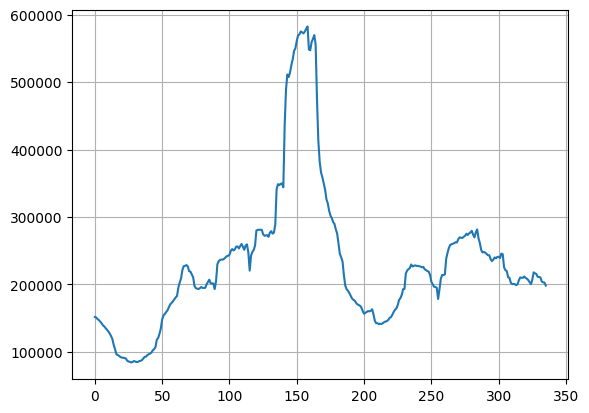

In [76]:
volumen_chart_intercambio['Volumen'].plot()
plt.grid()

# coins

In [77]:
#precio del criptomoneda por dia


#id :pase la identificación de la moneda (se puede obtener de / monedas), por ejemplo. bitcoin
# vs_currencie : La moneda objetivo de los datos de mercado (usd, eur, jpy, etc.)
# days :Datos hasta el número de días atrás (p. ej., 1,14,30, máx.)
# interval: Intervalo de datos. Valor posible: diario
# precision :completo o cualquier valor entre 0 y 18 para especificar el lugar decimal para el valor del precio de la moneda

#obtener datos históricos diarios
dailyHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin',
                               vs_currency = 'usd',
                               days = 'max') #max es diario por dia

In [78]:
# datos historico
dailyHistoricalDataFrame = pd.DataFrame(data = dailyHistoricalData['prices'],
                                        columns = ['fecha', 'Precio'])
#reformatear fecha
dailyHistoricalDataFrame['fecha'] = dailyHistoricalDataFrame['fecha'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
dailyHistoricalDataFrame.sort_values('Precio',ascending=False)

,fecha,Precio
3115,11-08-2021,67617.015545
3116,11-09-2021,67145.374935
3096,10-20-2021,66237.517550
3121,11-14-2021,65648.977791
3117,11-10-2021,65061.054407
...,...,...
70,07-07-2013,77.502000
72,07-09-2013,77.000000
71,07-08-2013,76.391500
69,07-06-2013,68.083100


- el 11 de setiembre del 21 la criptomoneda bitcoin tuvo su mayor precio de 67617.015545 usd  mientras que hoy 25 de agosto del 23 se registra el precio 26102.469492 en dolares

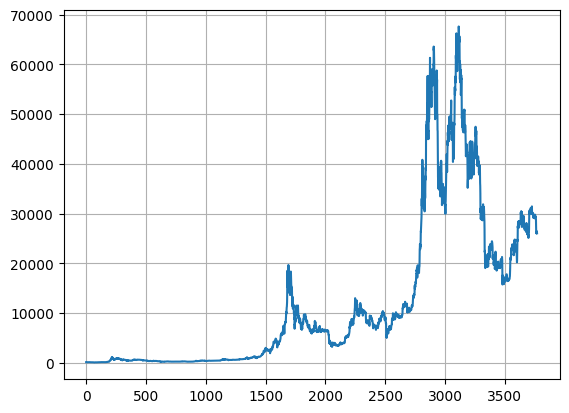

In [79]:
# plot
dailyHistoricalDataFrame['Precio'].plot()
plt.grid()

- de la grafica alrededor del dia 3020 hacia atras se registra mayor precio en la criptomoneda** bitcoin** es decir el 11 de setiembre del 21

In [7]:
# el ohlc de la moneda


#1 - 2 días: 30 minutos
#3 - 30 días: 4 horas
#31 días y más: 4 días
# id :pase la identificación de la moneda (se puede obtener de / monedas / lista), por ejemplo. bitcoin
# vs_currenci :La moneda objetivo de los datos de mercado (usd, eur, jpy, etc.)
# days :Datos hasta hace varios días (1/7/14/30/90/180/365/máx.)
# precision :completo o cualquier valor entre 0 y 18 para especificar el lugar decimal para el valor del precio de la moneda


ohlcData = cg.get_coin_ohlc_by_id(id = 'bitcoin', vs_currency = 'usd',days = '14')
ohlcDataFrame = pd.DataFrame(data = ohlcData,columns = ['Date', 'Open', 'High' ,'Low', 'Close'])


In [8]:
ohlcDataFrame

,Date,Open,High,Low,Close
0,1691812800000,29435.0,29435.0,29382.0,29382.0
1,1691827200000,29374.0,29392.0,29374.0,29388.0
2,1691841600000,29398.0,29405.0,29366.0,29405.0
3,1691856000000,29414.0,29435.0,29401.0,29435.0
4,1691870400000,29436.0,29444.0,29409.0,29409.0
...,...,...,...,...,...
80,1692964800000,25973.0,26103.0,25973.0,26103.0
81,1692979200000,26075.0,26119.0,25836.0,25836.0
82,1692993600000,25926.0,26016.0,25904.0,26016.0
83,1693008000000,25949.0,26068.0,25949.0,26037.0


In [9]:
#reformateo fecha
ohlcDataFrame['Date'] = ohlcDataFrame['Date'].apply(
                        lambda x: dt.datetime.fromtimestamp(x/1000
                        ).strftime('%m-%d-%Y %H:%M:%S'))

In [10]:
#generamos una grafica de ohlc de la criptomoneda bitcoin  por fecha
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=[go.Candlestick(x=ohlcDataFrame['Date'],
                open=ohlcDataFrame['Open'],
                high=ohlcDataFrame['High'],
                low=ohlcDataFrame['Low'],
                close=ohlcDataFrame['Close'])])
fig.show()

# contract

In [11]:
# historico de precios  para un tecnologia blockchain con contract adress
coinChartData = cg.get_coin_market_chart_from_contract_address_by_id(
                            id = 'binance-smart-chain',
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            days = 'max')

coinChartDataFrame = pd.DataFrame(data = coinChartData['prices'],
                                        columns = ['Date', 'Price'])

In [12]:
#reformateo fecha
coinChartDataFrame['Date'] = coinChartDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))

In [13]:
coinChartDataFrame

,Date,Price
0,09-28-2021,66.365063
1,09-29-2021,66.365063
2,09-30-2021,64.055455
3,10-01-2021,68.667891
4,10-02-2021,72.164955
...,...,...
692,08-21-2023,10.381150
693,08-22-2023,10.114125
694,08-23-2023,10.350837
695,08-24-2023,10.089228


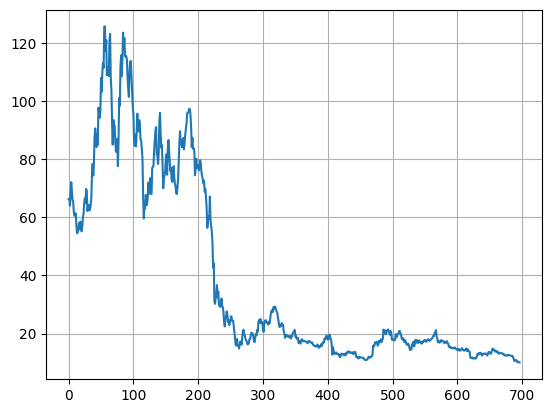

In [14]:
# grafica de historico precios por dia
coinChartDataFrame['Price'].plot()
plt.grid()

-alrededor del dia 99 hacia atras se reporta un mayor precio del historico de laa tecnologia **'binance-smart-chain'**

# intercambio de derivados

Los  intercambios de derivados para criptomonedas: por ejemplo Bybit es una plataforma especializada dedicada únicamente a los mercados de derivados. Está en el mercado desde 2018. Los derivados son una parte esencial de cualquier mercado, ya sea el mercado de valores, el mercado de divisas o el mercado de criptomonedas. Los comerciantes pueden utilizar varias estrategias para especular o mitigar sus pérdidas mediante cobertura.

In [400]:
#derivados
derivTickers = cg.get_derivatives()

In [402]:
#intercambio de derivados
derivExchg = cg.get_derivatives_exchanges()
derivExchgDataFrame = pd.DataFrame(derivExchg).sort_values('id'
                                                ).reset_index(drop=True)
derivExchgDataFrame.head(3)

,name,id,open_interest_btc,trade_volume_24h_btc,number_of_perpetual_pairs,number_of_futures_pairs,image,year_established,country,description,url
0,Flipster,aqx_derivatives,NaN,1170.29,142,0,https://assets.coingecko.com/markets/images/10...,2021.0,Seychelles,,https://flipster.xyz/
1,Binance (Futures),binance_futures,251547.53,1011571.25,256,22,https://assets.coingecko.com/markets/images/46...,2019.0,None,,https://www.binance.com/
2,BingX (Futures),bingx_futures,56151.06,175062.38,162,0,https://assets.coingecko.com/markets/images/91...,NaN,None,"Founded in 2018, BingX is a crypto social trad...",https://bingx.com/


In [407]:
derivExchgDataFrame.describe()

,open_interest_btc,number_of_perpetual_pairs,number_of_futures_pairs,year_established
count,40.000000,50.000000,50.00000,26.000000
mean,30634.219750,94.440000,6.22000,2017.653846
std,54342.713424,90.595797,22.95985,5.313698
min,0.080000,0.000000,0.00000,1996.000000
25%,473.230000,25.250000,0.00000,2017.250000
50%,5652.655000,56.000000,0.00000,2019.000000
75%,39855.605000,139.000000,0.00000,2020.750000
max,251547.530000,344.000000,156.00000,2023.000000


- de las variables numericas no se ha encontrado alguna que siga una distribucion normal .entonces se podria decir que tienen distribuciin sesgada

In [ ]:
#Obtenga tipos de cambio de BTC a moneda
exchangeRates = cg.get_exchange_rates()

exchangeRatesDataFrame = pd.DataFrame(exchangeRates['rates'])
exchangeRatesDataFrame

,btc,eth,ltc,bch,bnb,eos,xrp,xlm,link,dot,yfi,usd,aed,ars,aud,bdt,bhd,bmd,brl,cad,chf,clp,cny,czk,dkk,eur,gbp,hkd,huf,idr,ils,inr,jpy,krw,kwd,lkr,mmk,mxn,myr,ngn,nok,nzd,php,pkr,pln,rub,sar,sek,sgd,thb,try,twd,uah,vef,vnd,zar,xdr,xag,xau,bits,sats
name,Bitcoin,Ether,Litecoin,Bitcoin Cash,Binance Coin,EOS,XRP,Lumens,Chainlink,Polkadot,Yearn.finance,US Dollar,United Arab Emirates Dirham,Argentine Peso,Australian Dollar,Bangladeshi Taka,Bahraini Dinar,Bermudian Dollar,Brazil Real,Canadian Dollar,Swiss Franc,Chilean Peso,Chinese Yuan,Czech Koruna,Danish Krone,Euro,British Pound Sterling,Hong Kong Dollar,Hungarian Forint,Indonesian Rupiah,Israeli New Shekel,Indian Rupee,Japanese Yen,South Korean Won,Kuwaiti Dinar,Sri Lankan Rupee,Burmese Kyat,Mexican Peso,Malaysian Ringgit,Nigerian Naira,Norwegian Krone,New Zealand Dollar,Philippine Peso,Pakistani Rupee,Polish Zloty,Russian Ruble,Saudi Riyal,Swedish Krona,Singapore Dollar,Thai Baht,Turkish Lira,New Taiwan Dollar,Ukrainian hryvnia,Venezuelan bolívar fuerte,Vietnamese đồng,South African Rand,IMF Special Drawing Rights,Silver - Troy Ounce,Gold - Troy Ounce,Bits,Satoshi
unit,BTC,ETH,LTC,BCH,BNB,EOS,XRP,XLM,LINK,DOT,YFI,$,DH,$,A$,৳,BD,$,R$,CA$,Fr.,CLP$,¥,Kč,kr.,€,£,HK$,Ft,Rp,₪,₹,¥,₩,KD,Rs,K,MX$,RM,₦,kr,NZ$,₱,₨,zł,₽,SR,kr,S$,฿,₺,NT$,₴,Bs.F,₫,R,XDR,XAG,XAU,μBTC,sats
value,1.0,15.767,406.008,136.81,121.023,45199.618,50476.424,213594.215,4318.165,5911.934,4.681,26037.436,95636.416,9112454.583,40643.501,2844516.331,9817.337,26037.436,127109.558,35394.562,23075.886,22137289.101,189706.16,583034.189,179943.423,24142.171,20719.446,204243.121,9271948.177,398301704.247,99072.29,2152163.573,3805410.437,34480805.24,8034.371,8448881.003,54676354.318,438225.604,121048.043,19676751.328,279538.415,44143.583,1475281.166,7811166.4,108106.213,2466786.783,97679.47,286926.434,35317.075,914472.793,681215.999,828513.815,961647.447,2607.128,625009144.467,491536.475,19577.496,1083.149,13.605,1000000.0,100000000.0
type,crypto,crypto,crypto,crypto,crypto,crypto,crypto,crypto,crypto,crypto,crypto,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,fiat,commodity,commodity,crypto,crypto


# trending

In [403]:
#Las 7 monedas más populares en CoinGecko según lo buscado por los usuarios en las últimas 24 horas (ordenado por el más popular primero)
trendingCoins = cg.get_search_trending() #['coins']
pd.DataFrame.from_dict(trendingCoins['coins'])
#trendingCoins

,item
0,"{'id': 'pepe', 'coin_id': 29850, 'name': 'Pepe..."
1,"{'id': 'kadena', 'coin_id': 3693, 'name': 'Kad..."
2,"{'id': 'klay-token', 'coin_id': 9672, 'name': ..."
3,"{'id': 'sei-network', 'coin_id': 28205, 'name'..."
4,"{'id': 'unibot', 'coin_id': 30462, 'name': 'Un..."
5,"{'id': 'arbitrum', 'coin_id': 16547, 'name': '..."
6,"{'id': 'rollbit-coin', 'coin_id': 24552, 'name..."
7,"{'id': 'worldcoin-wld', 'coin_id': 31069, 'nam..."


# global

In [404]:
#Obtenga datos globales de criptomoneda
globalData = cg.get_global()
print(globalData)

{'active_cryptocurrencies': 10214, 'upcoming_icos': 0, 'ongoing_icos': 49, 'ended_icos': 3376, 'markets': 838, 'total_market_cap': {'btc': 41934062.73125983, 'eth': 662249961.4383396, 'ltc': 16782874376.236427, 'bch': 5664401742.6090975, 'bnb': 5010545583.750796, 'eos': 1862405579911.9514, 'xrp': 2083062749020.7097, 'xlm': 8863346974179.738, 'link': 183164111164.13647, 'dot': 244420514139.86444, 'yfi': 190098250.559347, 'usd': 1091577767803.757, 'aed': 4009403346365.068, 'ars': 382066081768965.8, 'aud': 1704524882291.9924, 'bdt': 119191413350606.7, 'bhd': 412052050523.86523, 'bmd': 1091577767803.757, 'brl': 5319913409168.376, 'cad': 1485691920869.3044, 'chf': 965663180709.827, 'clp': 922710687124514.5, 'cny': 7957274453959.033, 'czk': 24371329348424.117, 'dkk': 7536689540024.239, 'eur': 1011189614671.6166, 'gbp': 867639497161.0491, 'hkd': 8562281431764.272, 'huf': 386069224916832.6, 'idr': 1.669895669186185e+16, 'ils': 4151619555843.381, 'inr': 90107842112150.97, 'jpy': 159845190428342

In [406]:

globalDefiData = cg.get_global_decentralized_finance_defi()
globalDefiData

{'defi_market_cap': '41181880607.1054349404672278112',
 'eth_market_cap': '198230377868.5732825580226693168',
 'defi_to_eth_ratio': '20.7747576581874938396923462572651955360341847260332787451073094',
 'trading_volume_24h': '1222833822.442206842183187233664',
 'defi_dominance': '3.7717957694505146772843723741030514495158922907018045243419151',
 'top_coin_name': 'Lido Staked Ether',
 'top_coin_defi_dominance': 33.55384655178565}

# compañiass (beta)

In [ ]:

#participaciones de bitcoin o ethereum de empresas públicas (ordenadas por tenencias totales descendentes)
publicBTC = cg.get_companies_public_treasury_by_coin_id(coin_id = 'bitcoin')
publicETH = cg.get_companies_public_treasury_by_coin_id(coin_id = 'ethereum')

In [ ]:

#total_holdings:tenencias totales
#total_value_usd	:valor total usd
#market_cap_dominance:empresas con dominio de capitalización de mercado
pd.DataFrame(publicETH).sort_values('market_cap_dominance',ascending=False)

,total_holdings,total_value_usd,market_cap_dominance,companies
0,80026.1,1.344467e+08,0.07,"{'name': 'Coinbase Global, Inc', 'symbol': 'NA..."
1,80026.1,1.344467e+08,0.07,"{'name': 'Meitu', 'symbol': 'HKG:1357', 'count..."
2,80026.1,1.344467e+08,0.07,"{'name': 'Mogo Inc.', 'symbol': 'NASDAQ:MOGO',..."
